<a href="https://colab.research.google.com/github/Pharaohleft/nba-home-win-prediction/blob/main/Untitled27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

# Step 1: Fetch the page
url = "https://www.basketball-reference.com/leagues/NBA_2024_totals.html"
res = requests.get(url)
res = requests.get(url)
res.encoding = 'utf-8'  # Force UTF-8 to fix special characters
soup = BeautifulSoup(res.text, "html.parser")

# Step 2: Find the stats table
table = soup.find("table", {"id": "totals_stats"})

# Step 3: Parse the table into a DataFrame

df = pd.read_html(StringIO(str(table)))[0]


# Step 4: Remove duplicate header rows inside the table (if any)
df = df[df["Player"] != "Player"]

# Step 5: Reset index and show sample
df.reset_index(drop=True, inplace=True)
print(df.head())

# Step 6: Save to CSV (optional)
df.to_csv("nba_2024_player_totals.csv", index=False)


    Rk                   Player   Age Team Pos     G    GS      MP     FG  \
0  1.0              Luka Dončić  24.0  DAL  PG  70.0  70.0  2624.0  804.0   
1  2.0  Shai Gilgeous-Alexander  25.0  OKC  PG  75.0  75.0  2553.0  796.0   
2  3.0    Giannis Antetokounmpo  29.0  MIL  PF  73.0  73.0  2567.0  837.0   
3  4.0            Jalen Brunson  27.0  NYK  PG  77.0  77.0  2726.0  790.0   
4  5.0             Nikola Jokić  28.0  DEN   C  79.0  79.0  2737.0  822.0   

      FGA  ...    DRB    TRB    AST    STL   BLK    TOV     PF     PTS  \
0  1652.0  ...  588.0  647.0  686.0   99.0  38.0  282.0  149.0  2370.0   
1  1487.0  ...  350.0  415.0  465.0  150.0  67.0  162.0  184.0  2254.0   
2  1369.0  ...  645.0  841.0  476.0   87.0  79.0  250.0  210.0  2222.0   
3  1648.0  ...  235.0  278.0  519.0   70.0  13.0  186.0  144.0  2212.0   
4  1411.0  ...  753.0  976.0  708.0  108.0  68.0  237.0  194.0  2085.0   

   Trp-Dbl                        Awards  
0     21.0          MVP-3,CPOY-6,AS,NBA1  
1     

In [ ]:
# 1. Drop header rows mistakenly inside the table
df = df[df["Player"] != "Player"]

# 2. Reset index
df.reset_index(drop=True, inplace=True)

# 3. Convert all numeric columns from object to numbers
for col in df.columns[5:]:  # Skip first few columns like Player, Pos, Team
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 4. Remove duplicate player rows (keep their totals)
df = df.groupby("Player", as_index=False).sum(numeric_only=True)

# 5. Merge back player names and keep only relevant columns
# Optional: Keep only players who played more than X games
df = df[df["G"] > 10]

# 6. Show the cleaned data
print(df.head())


          Player     Rk   Age     G    GS      MP     FG    FGA    FG%    3P  \
0     A.J. Green  313.0  24.0  56.0   0.0   614.0   83.0  196.0  0.423  69.0   
1    A.J. Lawson  385.0  23.0  42.0   0.0   311.0   54.0  121.0  0.446  13.0   
2     AJ Griffin  451.0  20.0  20.0   0.0   171.0   18.0   62.0  0.290  10.0   
3   Aaron Gordon   93.0  28.0  73.0  73.0  2297.0  398.0  716.0  0.556  40.0   
4  Aaron Holiday  216.0  27.0  78.0   1.0  1269.0  186.0  417.0  0.446  84.0   

   ...    DRB    TRB    AST   STL   BLK    TOV     PF     PTS  Trp-Dbl  Awards  
0  ...   55.0   64.0   30.0   9.0   4.0   12.0   49.0   252.0      0.0     0.0  
1  ...   36.0   50.0   20.0  10.0   3.0   14.0   22.0   136.0      0.0     0.0  
2  ...   16.0   18.0    5.0   1.0   2.0    8.0    6.0    48.0      0.0     0.0  
3  ...  297.0  471.0  259.0  56.0  45.0  105.0  142.0  1013.0      0.0     0.0  
4  ...  100.0  123.0  140.0  42.0   6.0   53.0  125.0   514.0      0.0     0.0  

[5 rows x 30 columns]


🏀 Top 10 Scorers:
                      Player     PTS
456            Pascal Siakam  3474.0
522             Terry Rozier  2410.0
374              Luka Dončić  2370.0
472               RJ Barrett  2340.0
200        Immanuel Quickley  2312.0
502  Shai Gilgeous-Alexander  2254.0
135          Dennis Schröder  2244.0
184    Giannis Antetokounmpo  2222.0
233            Jalen Brunson  2212.0
435             Nikola Jokić  2085.0

🎯 Top 10 Assist Leaders:
                Player    AST
135    Dennis Schröder  976.0
550  Tyrese Haliburton  752.0
508  Spencer Dinwiddie  712.0
435       Nikola Jokić  708.0
329       Kelly Olynyk  694.0
374        Luka Dončić  686.0
456      Pascal Siakam  684.0
522       Terry Rozier  684.0
149   Domantas Sabonis  673.0
200  Immanuel Quickley  662.0


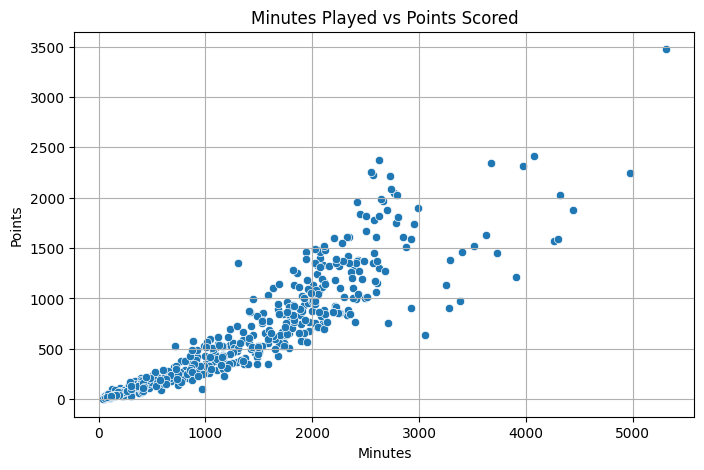

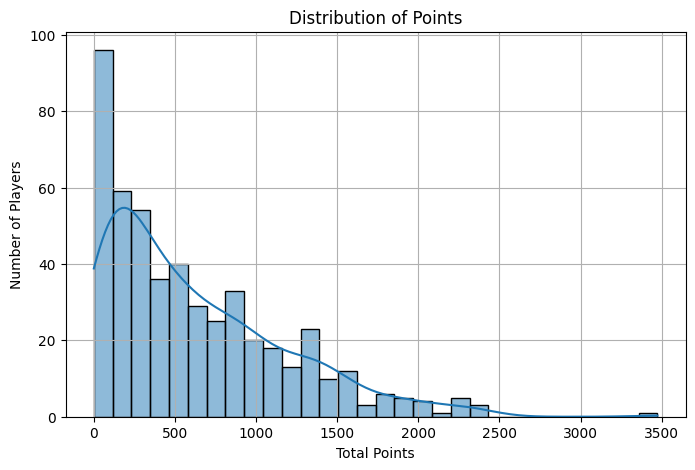

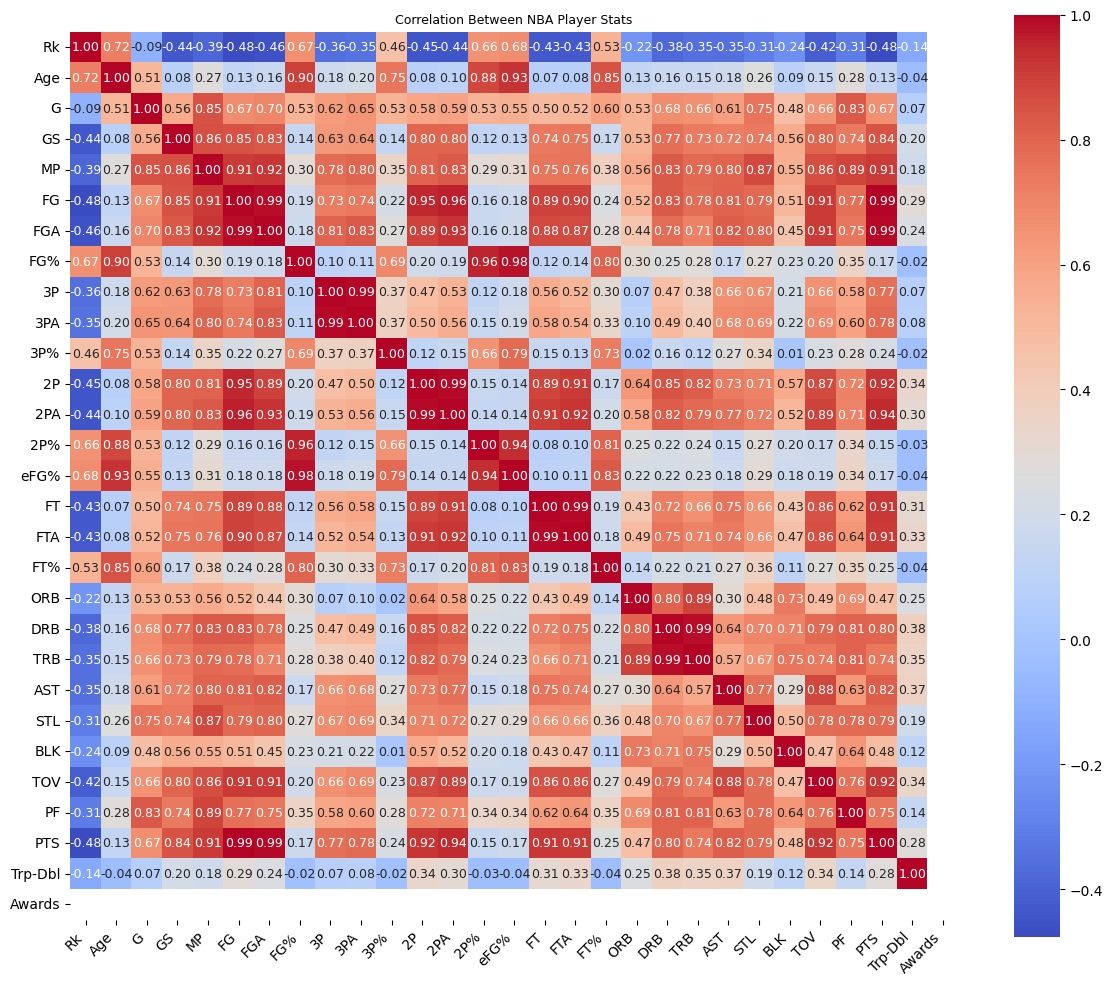

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Top 10 Scorers
top_scorers = df.sort_values("PTS", ascending=False).head(10)
print("🏀 Top 10 Scorers:")
print(top_scorers[["Player", "PTS"]])

# 2. Top 10 Assist Leaders
top_assists = df.sort_values("AST", ascending=False).head(10)
print("\n🎯 Top 10 Assist Leaders:")
print(top_assists[["Player", "AST"]])

# 3. Scatterplot: Minutes vs Points
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="MP", y="PTS")
plt.title("Minutes Played vs Points Scored")
plt.xlabel("Minutes")
plt.ylabel("Points")
plt.grid(True)
plt.show()

# 4. Histogram: Points
plt.figure(figsize=(8,5))
sns.histplot(df["PTS"], bins=30, kde=True)
plt.title("Distribution of Points")
plt.xlabel("Total Points")
plt.ylabel("Number of Players")
plt.grid(True)
plt.show()

# 5. Correlation Heatmap (numeric columns only)

plt.figure(figsize=(12, 10))  # Increase figure size

corr = df.select_dtypes("number").corr()

sns.heatmap(corr,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            square=True,
            cbar=True,
            annot_kws={"size": 9})  # make text smaller for clarity

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Between NBA Player Stats", fontsize=9)
plt.tight_layout()
plt.show()



In [ ]:
# Select features for clustering
features = df[["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]].copy()

# Fill any NaNs with 0
features = features.fillna(0)

# Standardize (very important for clustering)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


NameError: name 'df' is not defined

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

# Load the NBA 2024 season totals page
url = "https://www.basketball-reference.com/leagues/NBA_2024_totals.html"
res = requests.get(url)
res.encoding = 'utf-8'  # fix special characters
soup = BeautifulSoup(res.text, "html.parser")

# Find the table and parse it
table = soup.find("table", {"id": "totals_stats"})
df = pd.read_html(StringIO(str(table)))[0]

# Clean the data
df = df[df["Player"] != "Player"]  # remove duplicate headers
df.reset_index(drop=True, inplace=True)

# Convert all numeric columns
for col in df.columns[5:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Remove players with fewer than 10 games
df = df[df["G"] >= 10]

# Fix player name encoding
df["Player"] = df["Player"].apply(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)

# Show sample
df.head()


UnicodeEncodeError: 'latin-1' codec can't encode character '\u010d' in position 8: ordinal not in range(256)

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

# Load NBA 2024 totals page
url = "https://www.basketball-reference.com/leagues/NBA_2024_totals.html"
res = requests.get(url)
res.encoding = "utf-8"  # ✅ Force correct decoding
soup = BeautifulSoup(res.text, "html.parser")


# Parse the table
table = soup.find("table", {"id": "totals_stats"})
df = pd.read_html(StringIO(str(table)))[0]

# Remove embedded headers
df = df[df["Player"] != "Player"]
df.reset_index(drop=True, inplace=True)

# Convert numeric stats
for col in df.columns[5:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop players with very few games
df = df[df["G"] >= 10]

# Clean up player names
df["Player"] = df["Player"].str.strip()

df.head()


Rk                   Player   Age Team Pos     G    GS      MP     FG  \
0  1.0              Luka Dončić  24.0  DAL  PG  70.0  70.0  2624.0  804.0   
1  2.0  Shai Gilgeous-Alexander  25.0  OKC  PG  75.0  75.0  2553.0  796.0   
2  3.0    Giannis Antetokounmpo  29.0  MIL  PF  73.0  73.0  2567.0  837.0   
3  4.0            Jalen Brunson  27.0  NYK  PG  77.0  77.0  2726.0  790.0   
4  5.0             Nikola Jokić  28.0  DEN   C  79.0  79.0  2737.0  822.0   

      FGA  ...    DRB    TRB    AST    STL   BLK    TOV     PF     PTS  \
0  1652.0  ...  588.0  647.0  686.0   99.0  38.0  282.0  149.0  2370.0   
1  1487.0  ...  350.0  415.0  465.0  150.0  67.0  162.0  184.0  2254.0   
2  1369.0  ...  645.0  841.0  476.0   87.0  79.0  250.0  210.0  2222.0   
3  1648.0  ...  235.0  278.0  519.0   70.0  13.0  186.0  144.0  2212.0   
4  1411.0  ...  753.0  976.0  708.0  108.0  68.0  237.0  194.0  2085.0   

   Trp-Dbl  Awards  
0     21.0     NaN  
1      0.0     NaN  
2     10.0     NaN  
3      0.0     NaN  
4     25.0     NaN  

[5 rows x 32 columns]

In [ ]:
df = df.drop(columns=["Awards"])


In [ ]:
features = df[["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]].copy()
features = features.fillna(0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [ ]:
from sklearn.cluster import KMeans

# Set number of clusters (you can try different values)
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Preview with cluster labels
df[["Player", "PTS", "AST", "TRB", "Cluster"]].head()


Player     PTS    AST    TRB  Cluster
0              Luka Dončić  2370.0  686.0  647.0        2
1  Shai Gilgeous-Alexander  2254.0  465.0  415.0        2
2    Giannis Antetokounmpo  2222.0  476.0  841.0        2
3            Jalen Brunson  2212.0  519.0  278.0        2
4             Nikola Jokić  2085.0  708.0  976.0        2

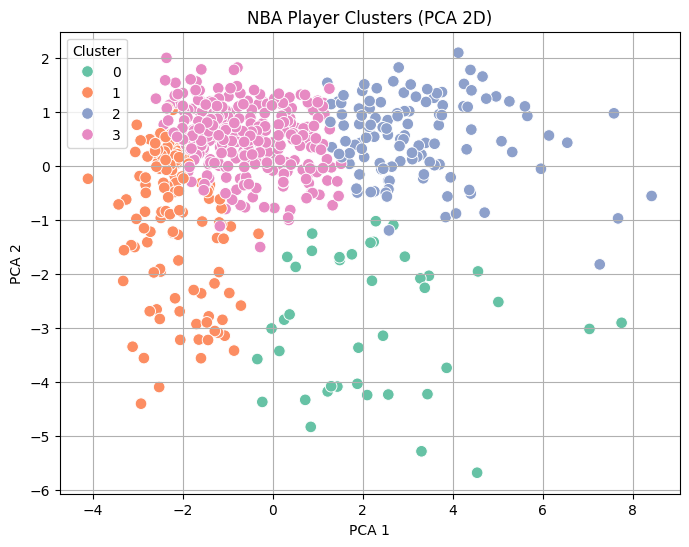

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"], palette="Set2", s=70)
plt.title("NBA Player Clusters (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


In [ ]:
df.groupby("Cluster")[["PTS", "AST", "TRB", "STL", "BLK"]].mean().round(1)


PTS    AST    TRB   STL   BLK
Cluster                                  
0         750.0  116.2  520.3  45.6  90.9
1          87.9   21.1   59.0   8.0   7.8
2        1242.3  319.6  363.9  69.4  36.7
3         355.3   81.2  138.3  28.1  14.7

KeyError: 318

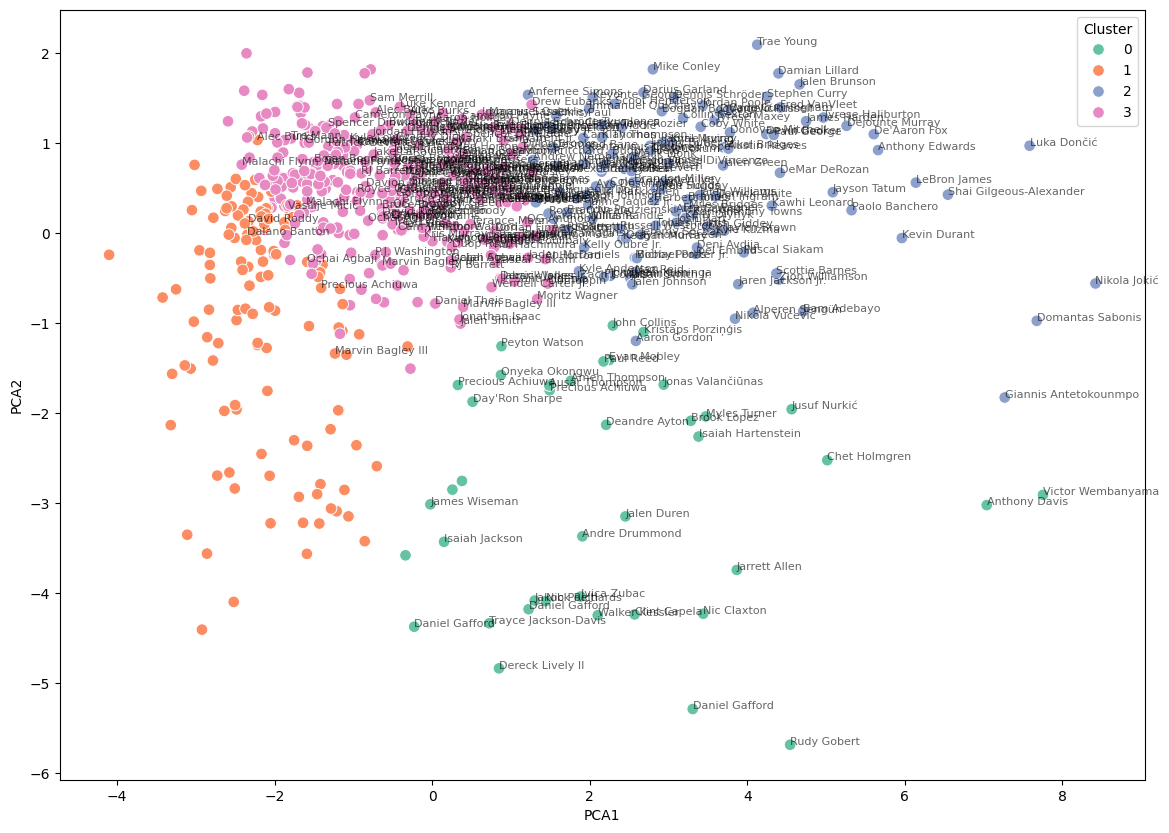

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Step 1: Reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 2: Add PCA coordinates to df
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# Step 3: Plot with names
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=70)

# Annotate with player names
for i in range(len(df)):
    plt.text(df.loc[i, "PCA1"], df.loc[i, "PCA2"], df.loc[i, "Player"], fontsize=8, alpha=0.6)

plt.title("NBA Player Clusters (Labeled by Name)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


KeyError: 318

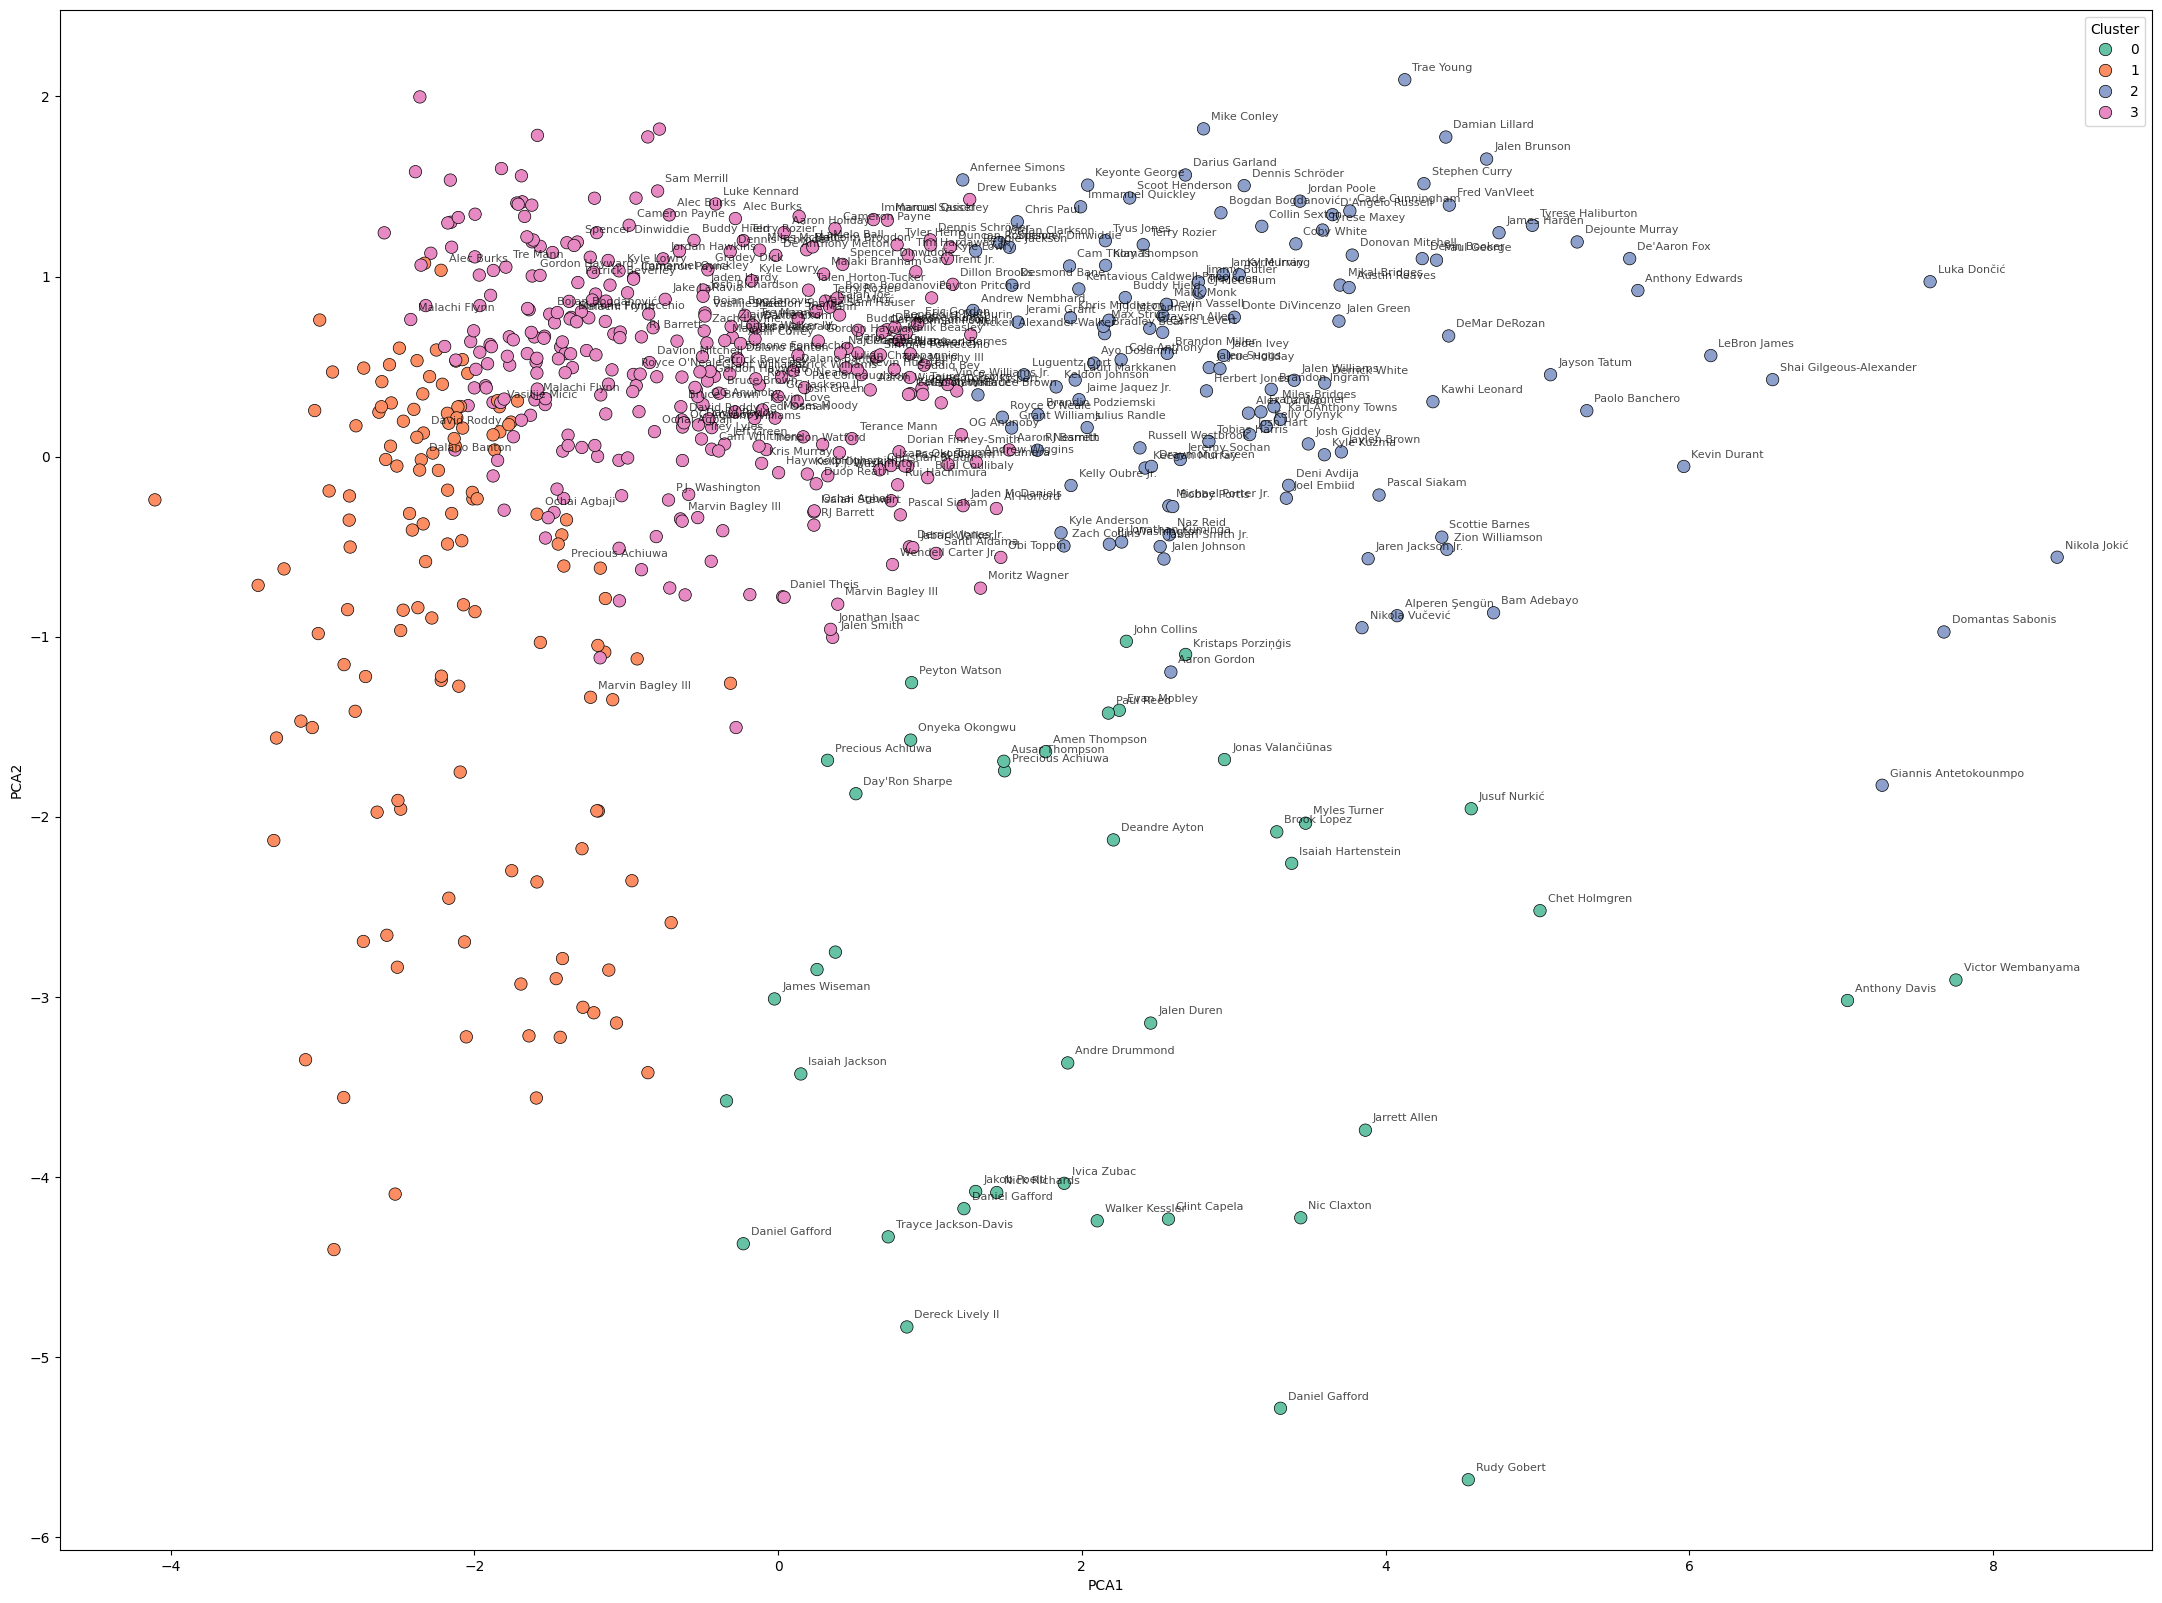

In [ ]:
plt.figure(figsize=(27, 20))  # 🔥 Much larger figure

sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=80, edgecolor='k', linewidth=0.5)

# Add player names
for i in range(len(df)):
    plt.text(df.loc[i, "PCA1"] + 0.05,  # slight shift right
             df.loc[i, "PCA2"] + 0.05,  # slight shift up
             df.loc[i, "Player"],
             fontsize=8, alpha=0.7)

plt.title("NBA Player Clusters (All Player Names)", fontsize=16)
plt.xlabel("PCA 1", fontsize=12)
plt.ylabel("PCA 2", fontsize=12)
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


KeyError: 318

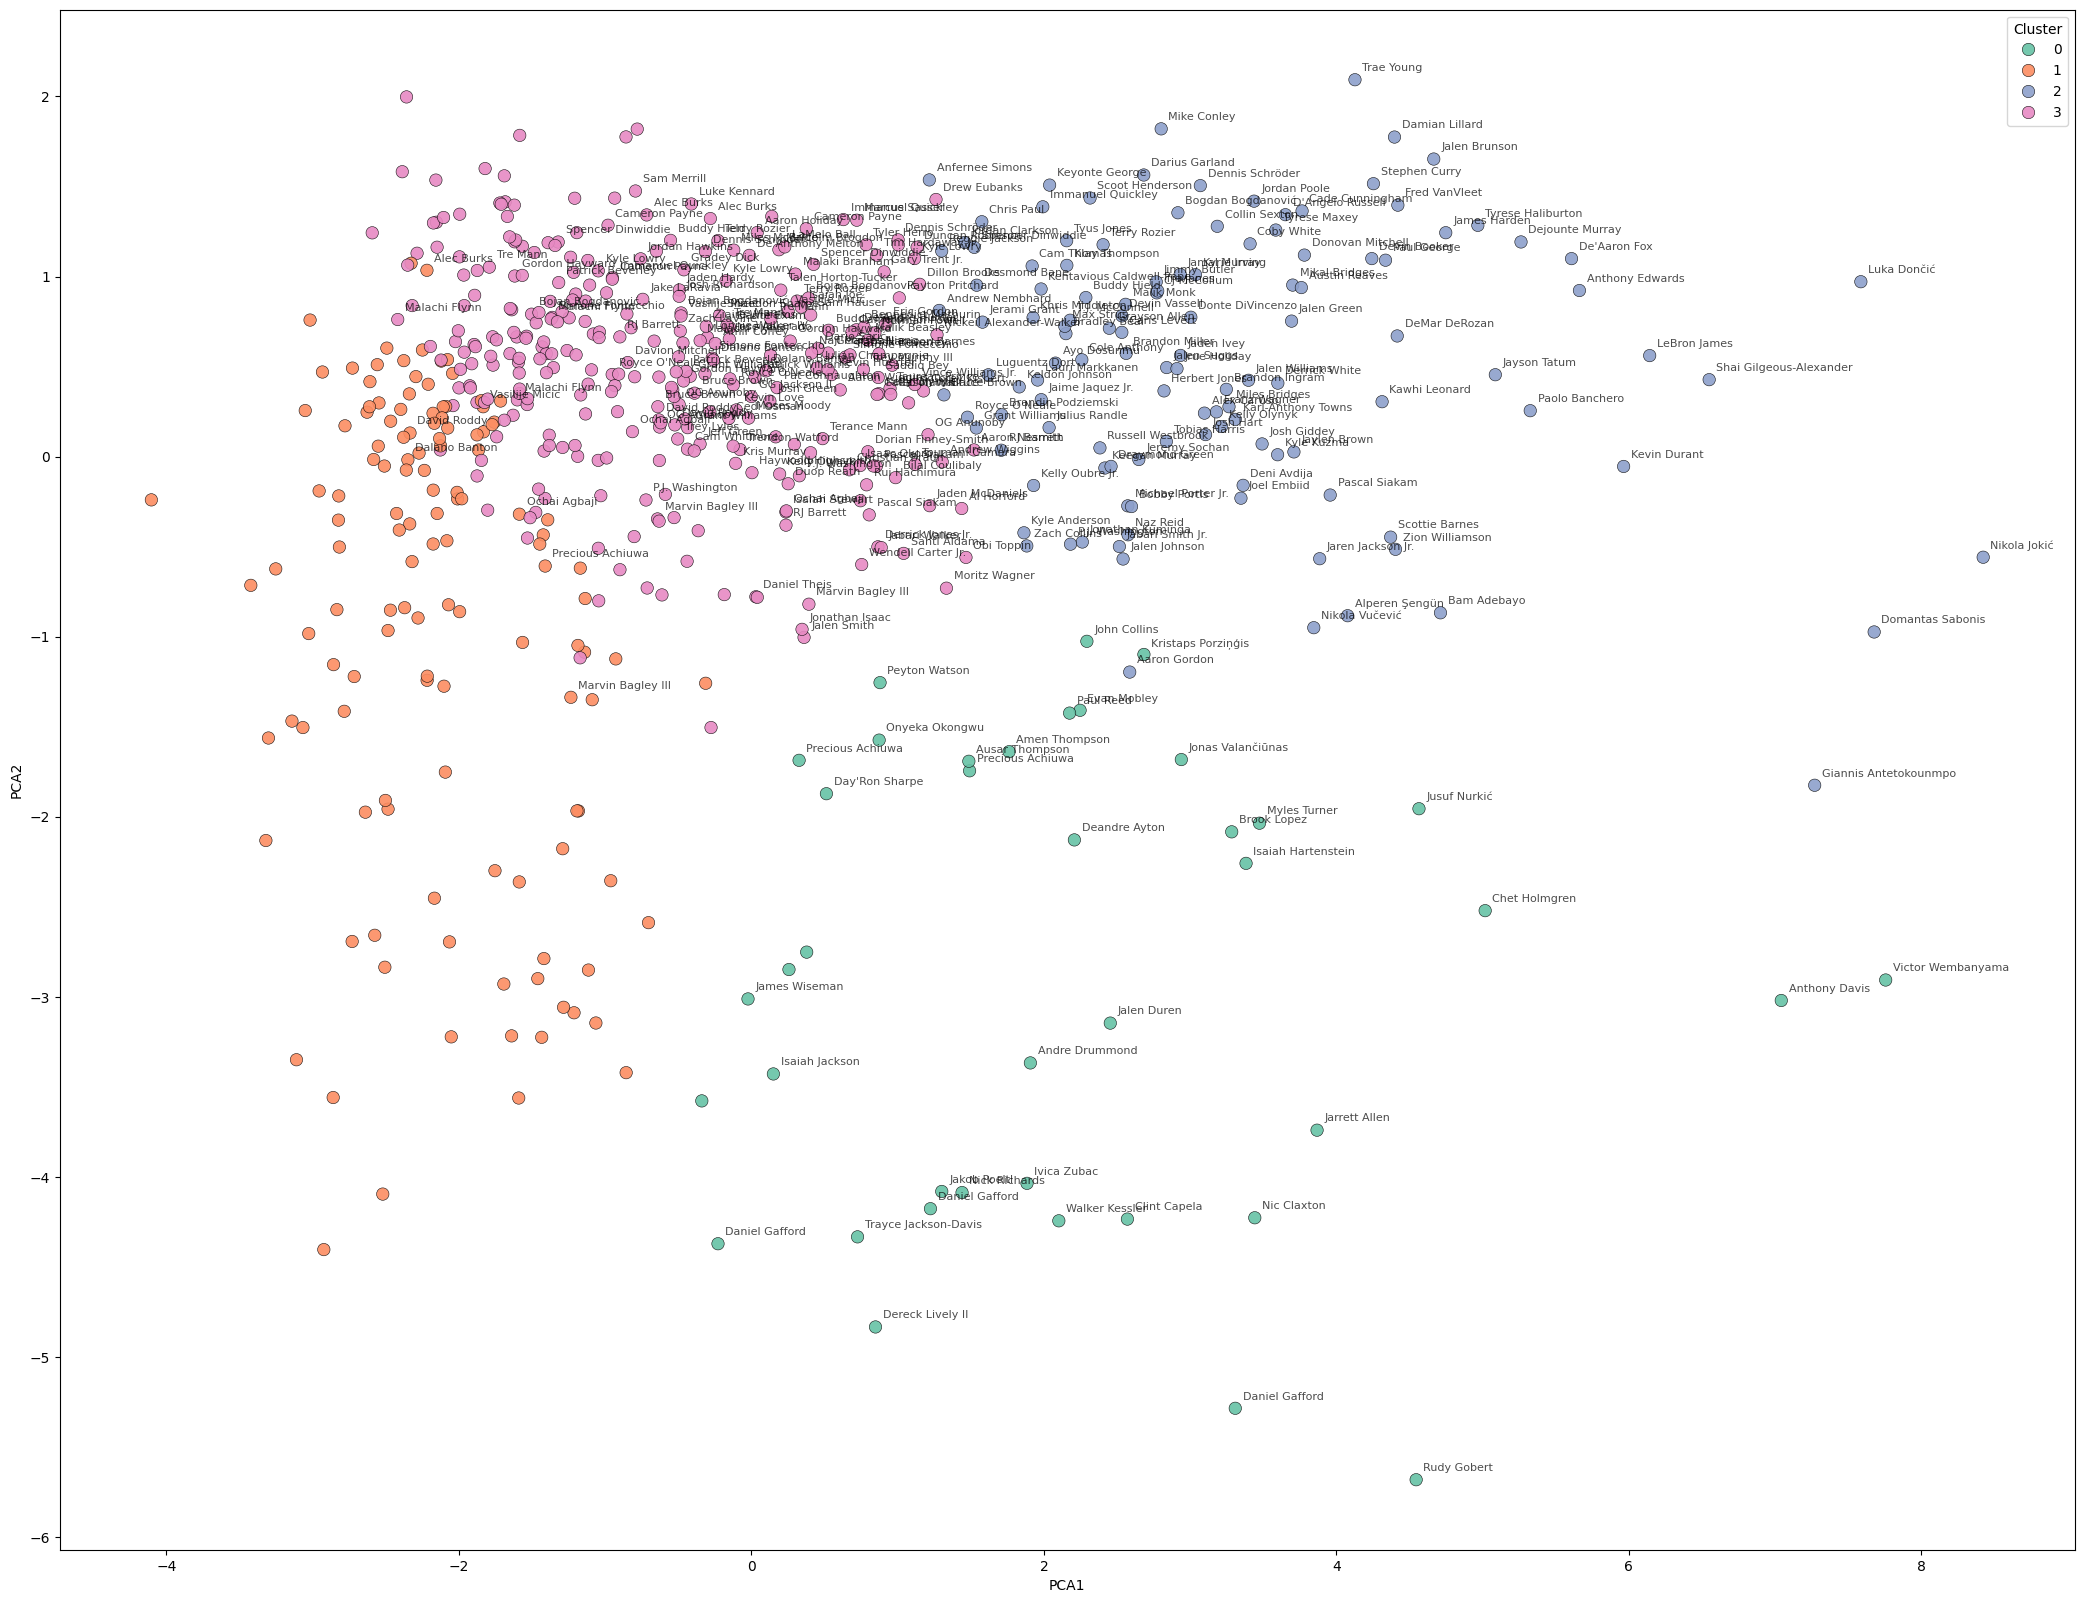

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set large figure size
plt.figure(figsize=(26, 20))  # 🔥 Large and readable

# Plot the PCA scatter with cluster colors
sns.scatterplot(
    data=df,
    x="PCA1", y="PCA2",
    hue="Cluster",
    palette="Set2",  # Distinct cluster colors
    s=80,
    edgecolor='black',
    linewidth=0.4,
    alpha=0.9
)

# Annotate each player with their name
for i in range(len(df)):
    plt.text(
        df.loc[i, "PCA1"] + 0.05,
        df.loc[i, "PCA2"] + 0.05,
        df.loc[i, "Player"],
        fontsize=8,
        alpha=0.7
    )

# Title and labels
plt.title("NBA Player Clusters (2024 Season)\nColored by Cluster Label", fontsize=20)
plt.xlabel("PCA 1", fontsize=14)
plt.ylabel("PCA 2", fontsize=14)

# Grid and legend
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Cluster", title_fontsize=12, fontsize=11, loc="best")
plt.tight_layout()
plt.show()


KeyError: 318

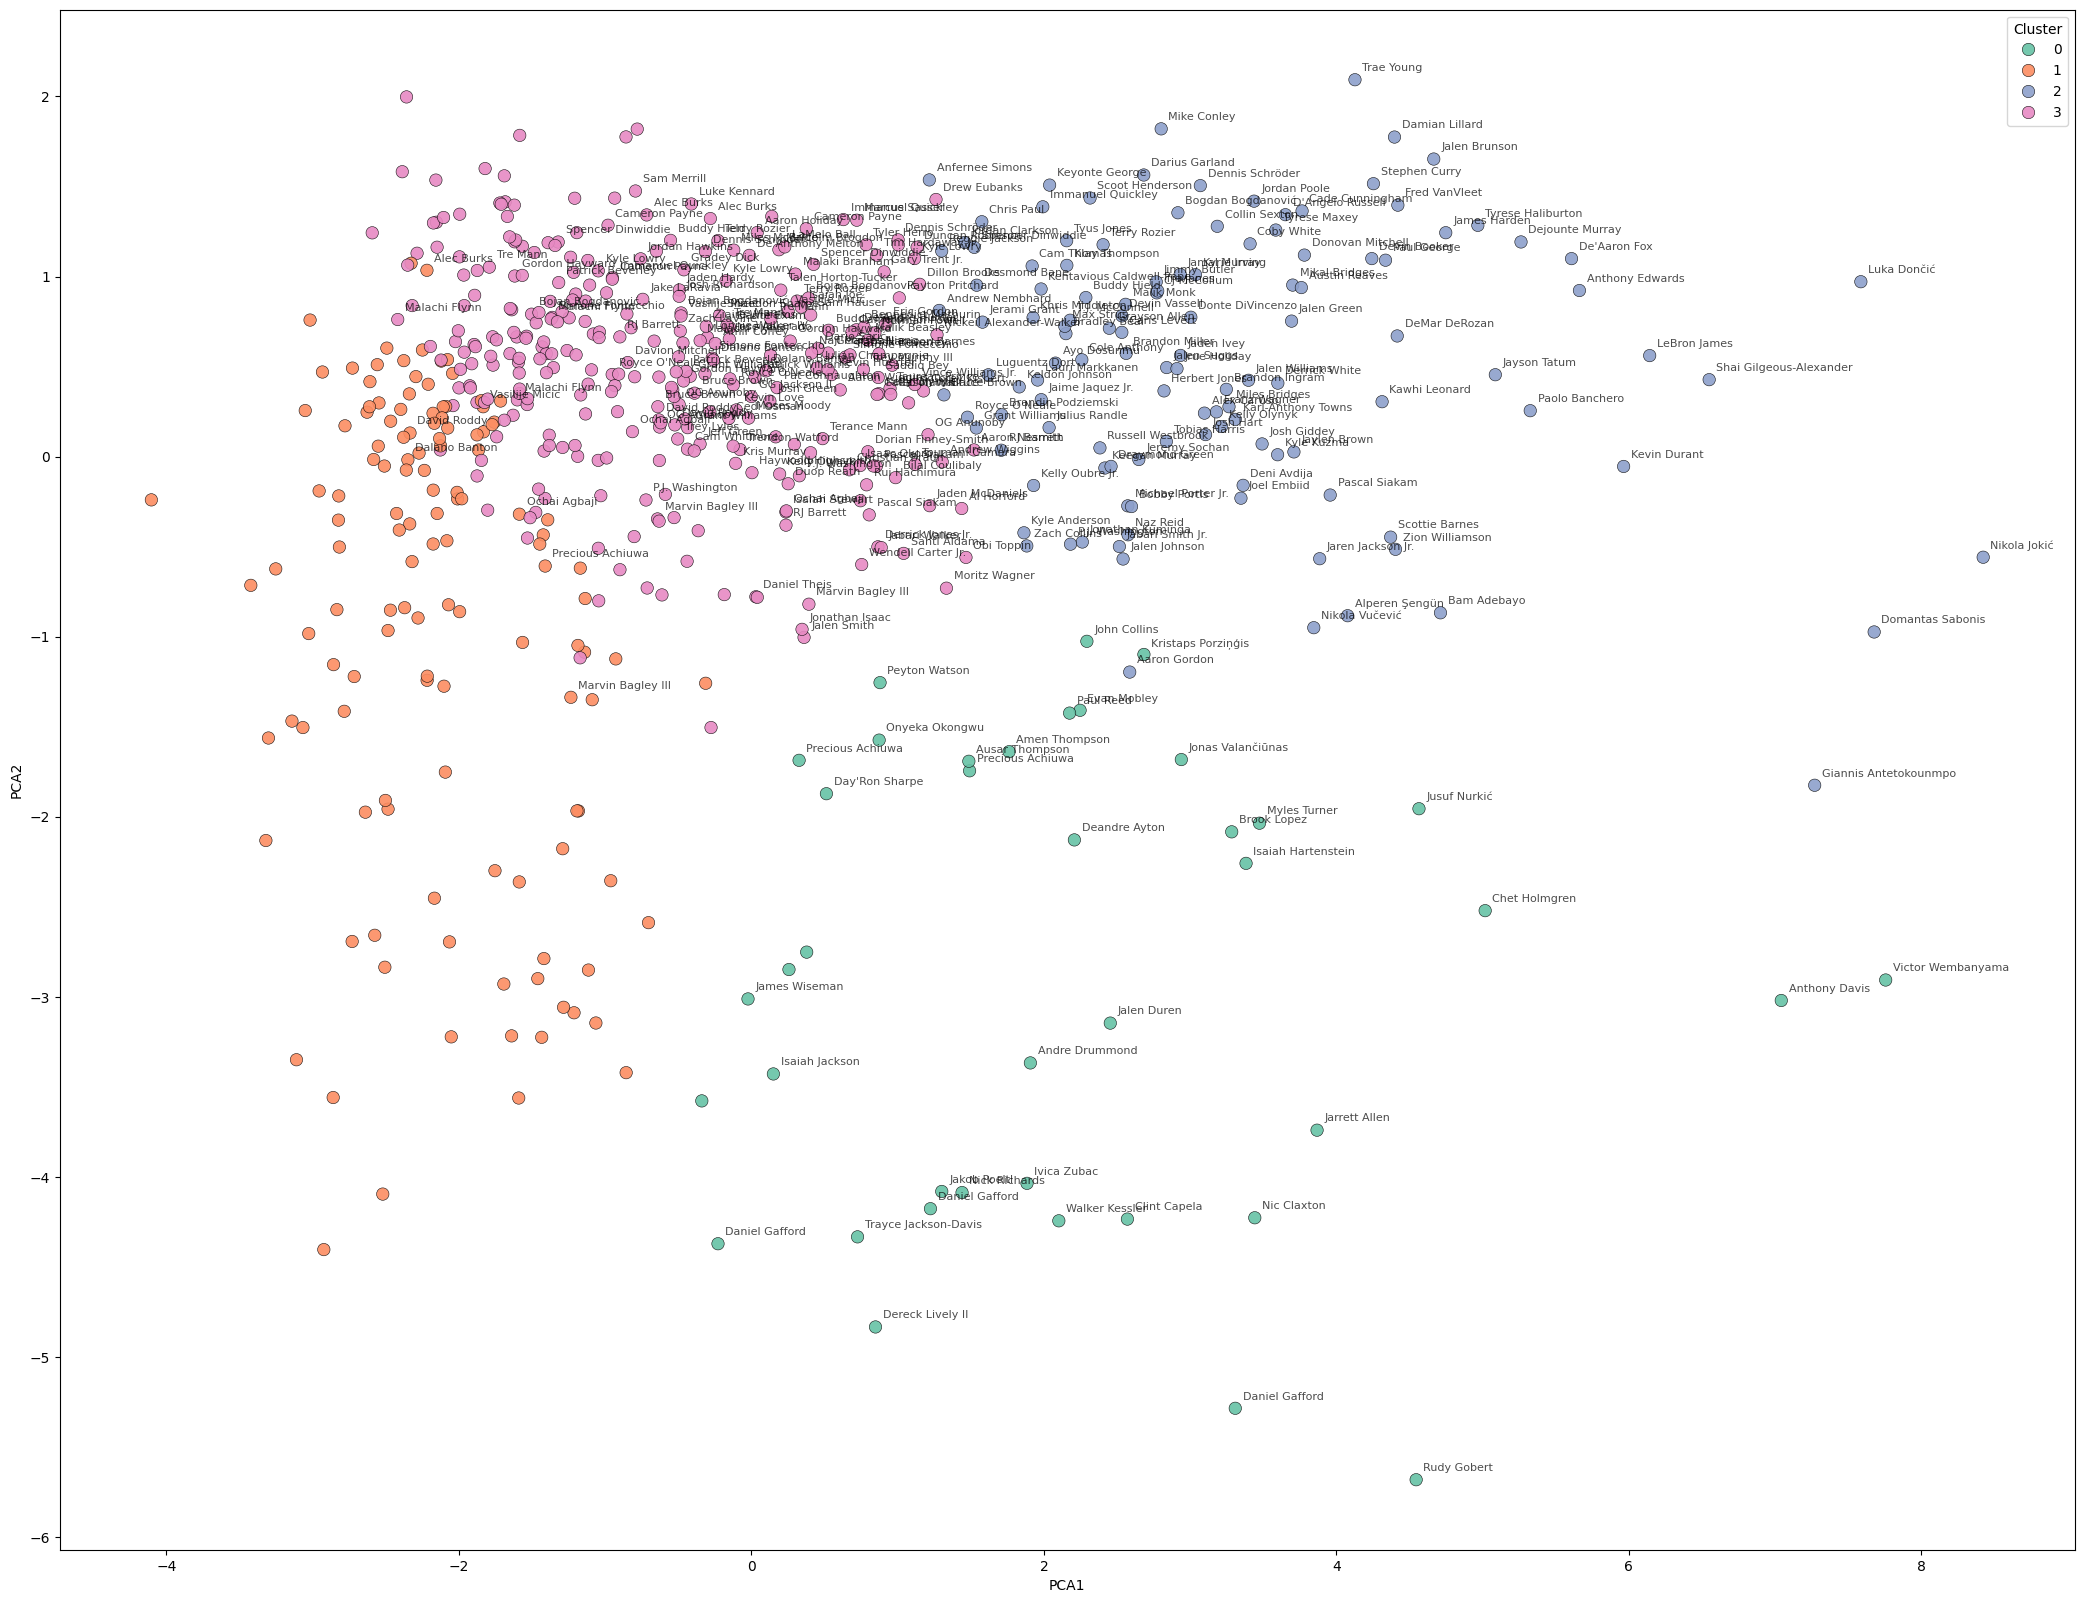

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(26, 20))

# Scatterplot with clusters
sns.scatterplot(
    data=df, x="PCA1", y="PCA2",
    hue="Cluster", palette="Set2",
    s=80, edgecolor="black", linewidth=0.4, alpha=0.9
)

# Player names
for i in range(len(df)):
    plt.text(
        df.loc[i, "PCA1"] + 0.05,
        df.loc[i, "PCA2"] + 0.05,
        df.loc[i, "Player"],
        fontsize=8, alpha=0.7
    )

# Custom cluster labels (adjust x/y to fit well)
cluster_labels = {
    0: "High-Volume Scorers",
    1: "Rebounders / Bigs",
    2: "Playmakers / Facilitators",
    3: "Low-Usage Role Players"
}

# Add these to the center of each cluster
for c, label in cluster_labels.items():
    x_mean = df[df["Cluster"] == c]["PCA1"].mean()
    y_mean = df[df["Cluster"] == c]["PCA2"].mean()
    plt.text(
        x_mean, y_mean,
        f"⬤ {label}",
        fontsize=14,
        weight="bold",
        color="black",
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )

plt.title("NBA Player Clusters with Interpreted Labels (2024)", fontsize=20)
plt.xlabel("PCA 1", fontsize=14)
plt.ylabel("PCA 2", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Cluster", title_fontsize=12, fontsize=11, loc="best")
plt.tight_layout()
plt.show()


In [1]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
import numpy as np

# Assume you have: features_scaled, original cluster labels
original_kmeans = KMeans(n_clusters=4, random_state=42)
original_labels = original_kmeans.fit_predict(features_scaled)

# Step 1: Add noise
np.random.seed(42)
noisy_data = features_scaled + np.random.normal(0, 0.05, features_scaled.shape)

# Step 2: Cluster again on noisy data
kmeans_noisy = KMeans(n_clusters=4, random_state=42)
noisy_labels = kmeans_noisy.fit_predict(noisy_data)

# Step 3: Compare clustering stability
ari_score = adjusted_rand_score(original_labels, noisy_labels)
print(f"🔁 Adjusted Rand Index (stability): {ari_score:.4f}")


NameError: name 'features_scaled' is not defined

In [ ]:
import numpy as np

# Step 1: Get PCA coordinates and cluster centers
from sklearn.metrics import pairwise_distances_argmin_min

# Store PCA columns
X_pca = df[["PCA1", "PCA2"]].values

# Calculate cluster centers in PCA space
cluster_centers = df.groupby("Cluster")[["PCA1", "PCA2"]].mean().values

# Step 2: Calculate distance from each point to every cluster center
from scipy.spatial.distance import cdist
distances = cdist(X_pca, cluster_centers)

# Step 3: For each player, get:
# - Their assigned cluster center distance
# - Nearest *other* cluster center
assigned_cluster = df["Cluster"].values
player_dist_to_own = distances[np.arange(len(distances)), assigned_cluster]
dist_to_next_best = np.partition(distances, 1, axis=1)[:, 1]  # second closest center

# Step 4: Define players near other clusters
borderline_mask = (dist_to_next_best - player_dist_to_own) < 0.5  # tweak threshold

# Step 5: Define edge players (furthest from their cluster center)
cluster_radii = {}
for c in range(4):
    dists = player_dist_to_own[assigned_cluster == c]
    threshold = np.percentile(dists, 85)  # furthest 15% in the cluster
    cluster_radii[c] = threshold
edge_mask = np.array([player_dist_to_own[i] > cluster_radii[assigned_cluster[i]] for i in range(len(df))])

# Combine both sets
label_mask = borderline_mask | edge_mask


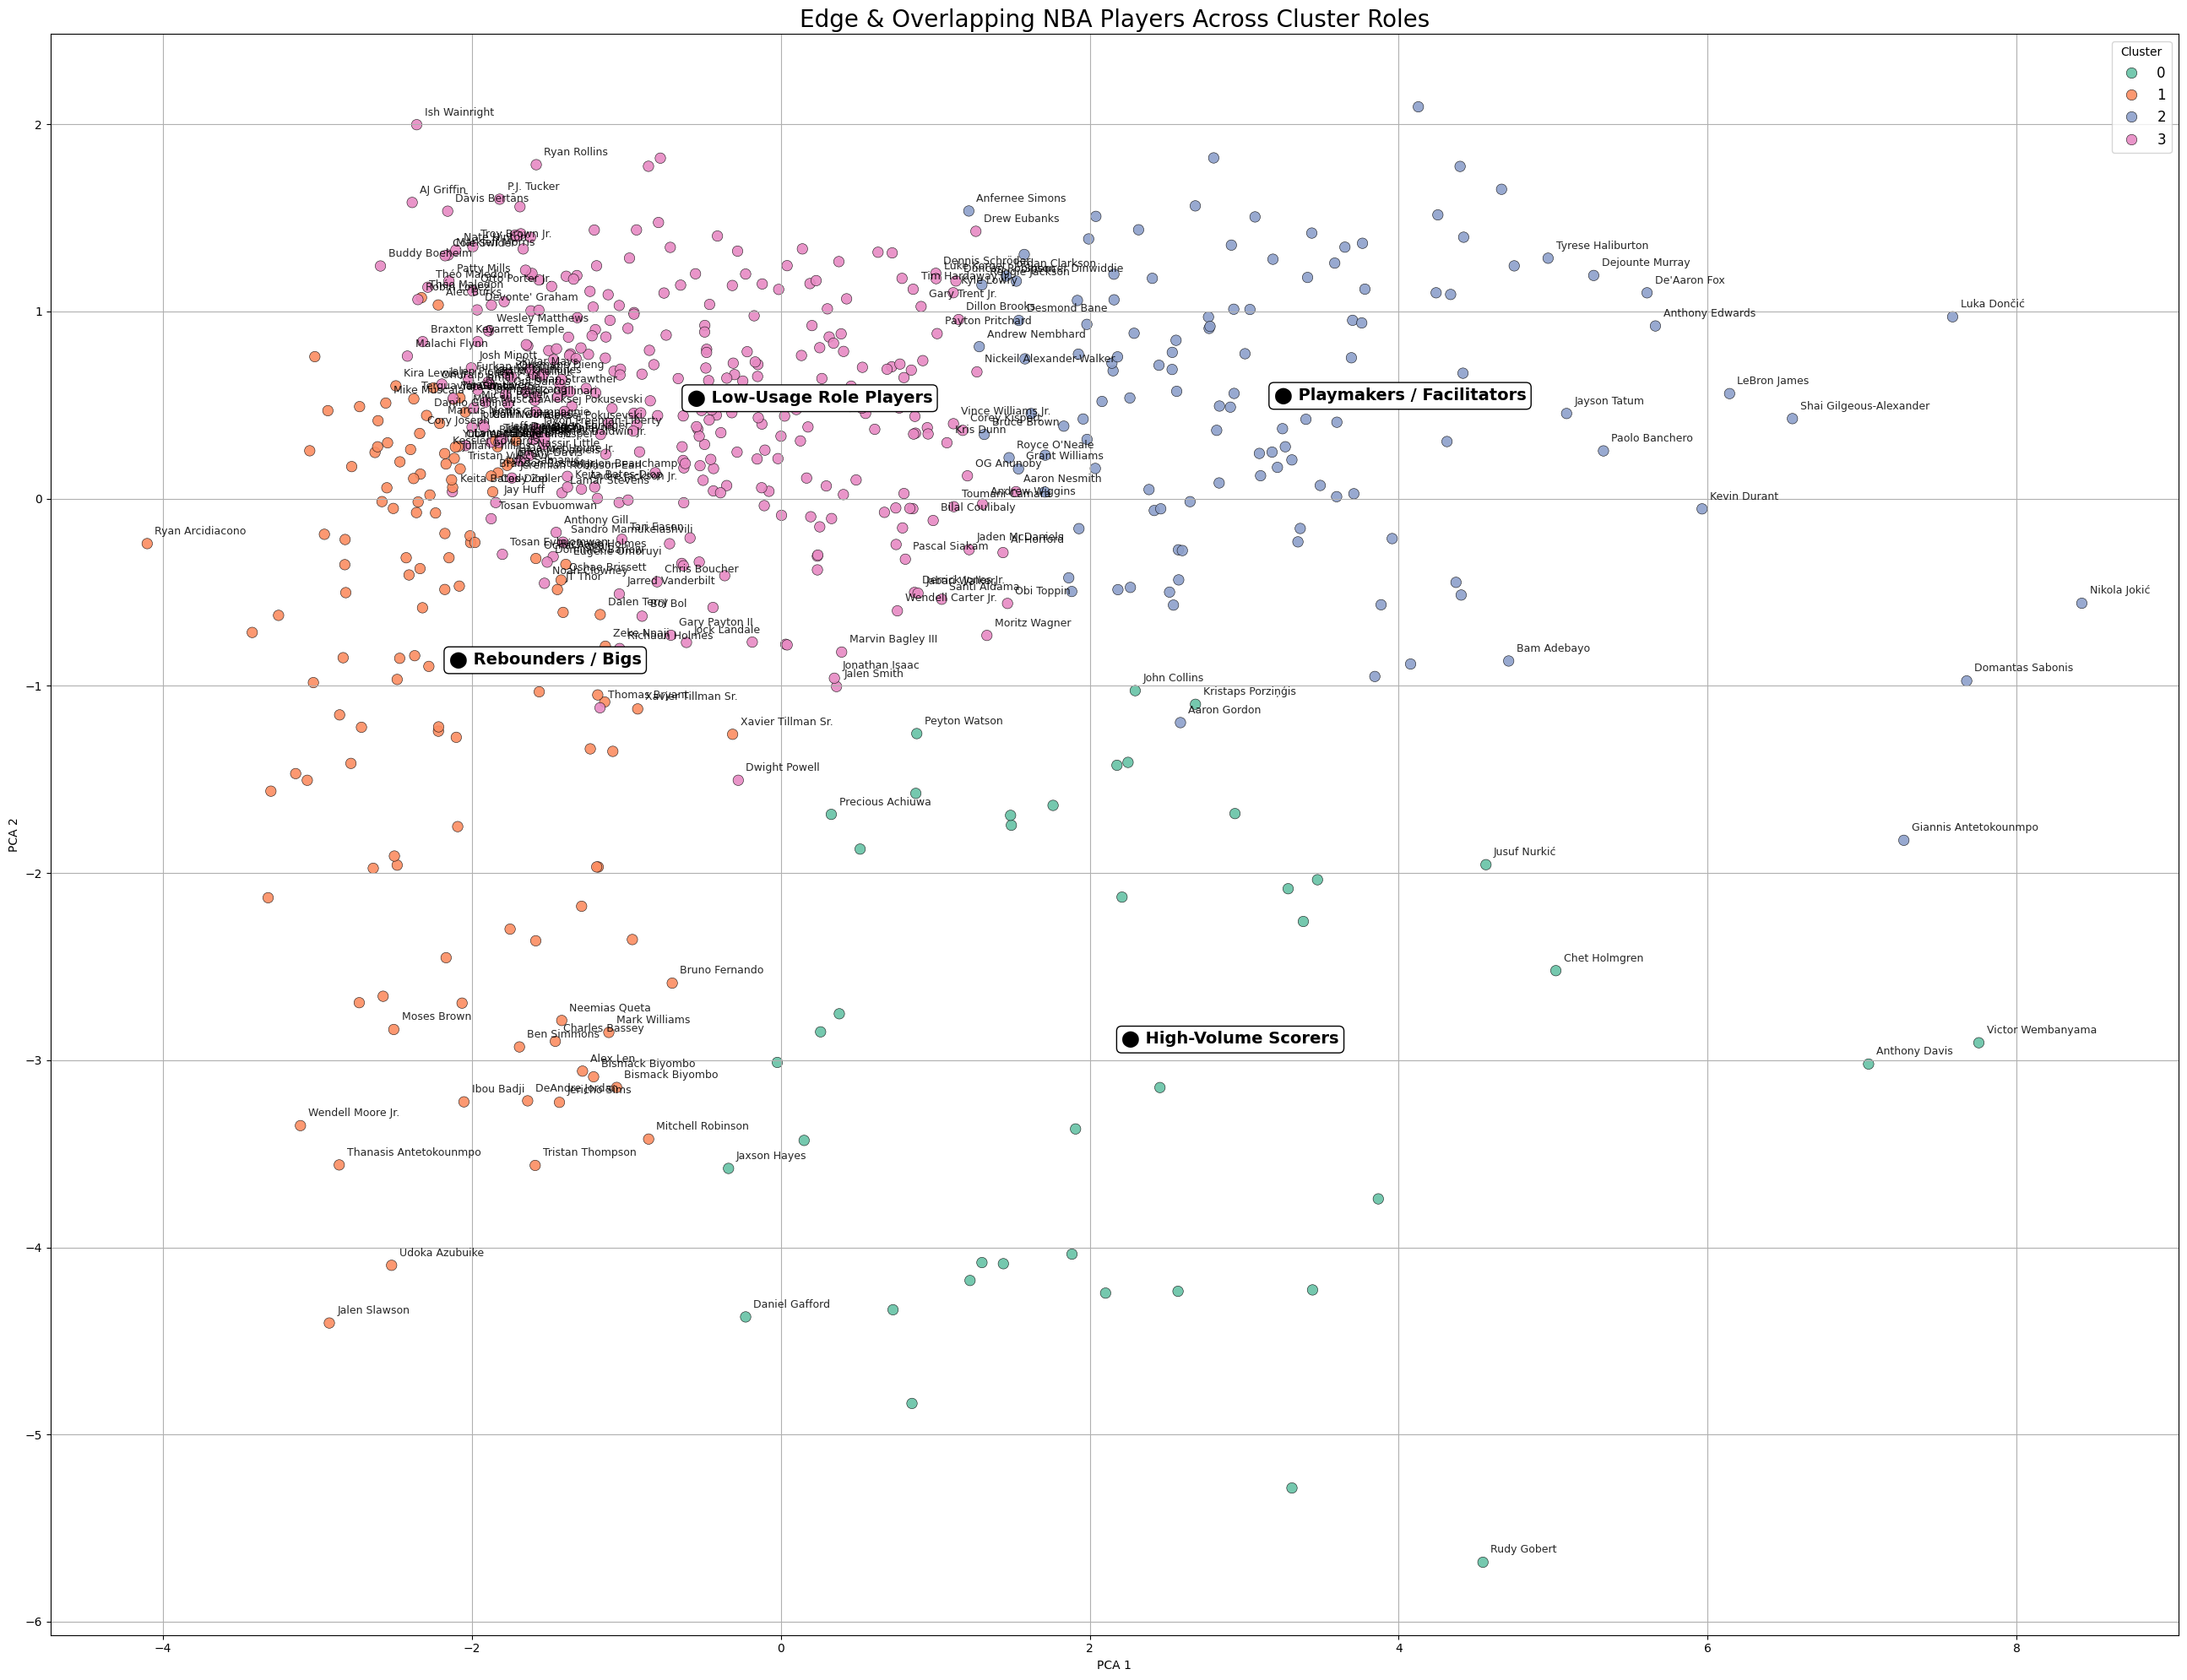

In [ ]:
plt.figure(figsize=(26, 20))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=80, edgecolor='black', linewidth=0.4, alpha=0.9)

# Show names only for edge/borderline players
for i in range(len(df)):
    if label_mask[i]:
        plt.text(df.iloc[i]["PCA1"] + 0.05,
                 df.iloc[i]["PCA2"] + 0.05,
                 df.iloc[i]["Player"],
                 fontsize=9, alpha=0.85)

# Optional: plot cluster role labels again (reuse from earlier)
for c, label in {
    0: "High-Volume Scorers",
    1: "Rebounders / Bigs",
    2: "Playmakers / Facilitators",
    3: "Low-Usage Role Players"
}.items():
    x_mean = df[df["Cluster"] == c]["PCA1"].mean()
    y_mean = df[df["Cluster"] == c]["PCA2"].mean()
    plt.text(x_mean, y_mean, f"⬤ {label}", fontsize=14, weight="bold",
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.title("Edge & Overlapping NBA Players Across Cluster Roles", fontsize=20)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Cluster", fontsize=12)
plt.show()


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your cleaned NBA player data
df = pd.read_csv("/content/nba_cleaned_with_pca_clusters.csv")

# Select features used for clustering (make sure these match your original cluster project)
feature_cols = ["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]

# Filter and scale
features = df[feature_cols].fillna(0)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [ ]:
df.to_csv("nba_cleaned_with_pca_clusters.csv", index=False)


NameError: name 'df' is not defined

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Scrape data
url = "https://www.basketball-reference.com/leagues/NBA_2024_totals.html"
res = requests.get(url)
res.encoding = "utf-8"
soup = BeautifulSoup(res.text, "html.parser")
table = soup.find("table", {"id": "totals_stats"})
df = pd.read_html(StringIO(str(table)))[0]
df = df[df["Player"] != "Player"]
df.reset_index(drop=True, inplace=True)

# Step 2: Convert numeric columns
for col in df.columns[5:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df[df["G"] >= 10]
df["Player"] = df["Player"].str.strip()
df = df.drop(columns=["Rk", "Awards"], errors="ignore")

# Step 3: Clustering prep
features = df[["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Step 4: K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Step 5: PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# Step 6: Save
df.to_csv("nba_cleaned_with_pca_clusters.csv", index=False)


In [4]:
from google.colab import files
files.download("nba_cleaned_with_pca_clusters.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
import pandas as pd

# Adjust if the filename is different
df = pd.read_csv("nba_cleaned_with_pca_clusters.csv")
df.head()


Player   Age Team Pos     G    GS      MP     FG     FGA  \
0              Luka Dončić  24.0  DAL  PG  70.0  70.0  2624.0  804.0  1652.0   
1  Shai Gilgeous-Alexander  25.0  OKC  PG  75.0  75.0  2553.0  796.0  1487.0   
2    Giannis Antetokounmpo  29.0  MIL  PF  73.0  73.0  2567.0  837.0  1369.0   
3            Jalen Brunson  27.0  NYK  PG  77.0  77.0  2726.0  790.0  1648.0   
4             Nikola Jokić  28.0  DEN   C  79.0  79.0  2737.0  822.0  1411.0   

     FG%  ...    AST    STL   BLK    TOV     PF     PTS  Trp-Dbl  Cluster  \
0  0.487  ...  686.0   99.0  38.0  282.0  149.0  2370.0     21.0        2   
1  0.535  ...  465.0  150.0  67.0  162.0  184.0  2254.0      0.0        2   
2  0.611  ...  476.0   87.0  79.0  250.0  210.0  2222.0     10.0        2   
3  0.479  ...  519.0   70.0  13.0  186.0  144.0  2212.0      0.0        2   
4  0.583  ...  708.0  108.0  68.0  237.0  194.0  2085.0     25.0        2   

       PCA1      PCA2  
0  7.585971  0.971179  
1  6.548835  0.427279  
2  7.270196 -1.825397  
3  4.665625  1.652434  
4  8.422472 -0.558985  

[5 rows x 33 columns]

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select the same features used in original clustering
features = df[["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Recreate original clusters
kmeans = KMeans(n_clusters=4, random_state=42)
features_scaled = features_scaled.fillna(0)

original_labels = kmeans.fit_predict(features_scaled)


In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load cleaned dataset with PCA and cluster labels
df = pd.read_csv("nba_cleaned_with_pca_clusters.csv")

# Optional: Drop non-numeric columns if present
df_numeric = df.select_dtypes(include=[np.number])


In [11]:
# Select the same features used originally
features = ["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]
X = df[features].copy()
X = X.fillna(0)  # Fix NaNs if any

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [12]:
# Run KMeans again on the original (scaled) data
kmeans = KMeans(n_clusters=4, random_state=42)
original_labels = kmeans.fit_predict(X_scaled)

# Save for later comparison
df["Cluster"] = original_labels


In [13]:
# Add Gaussian noise to simulate instability
X_noisy = X_scaled + np.random.normal(0, 0.2, size=X_scaled.shape)

# Run KMeans on noisy data
kmeans_noisy = KMeans(n_clusters=4, random_state=42)
noisy_labels = kmeans_noisy.fit_predict(X_noisy)

df["Noisy_Cluster"] = noisy_labels


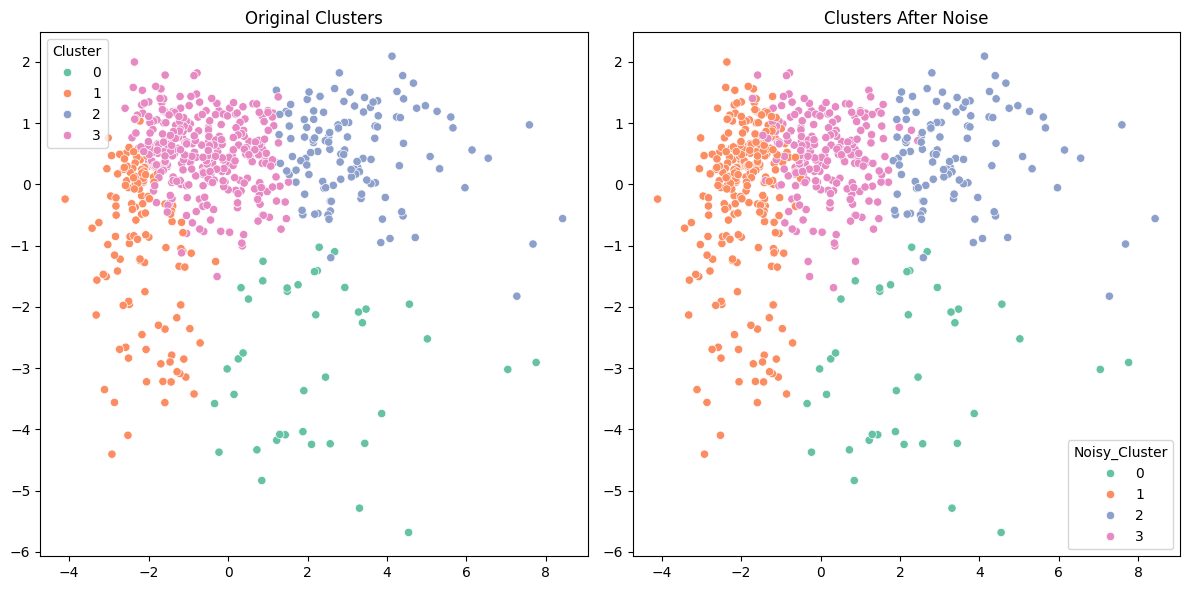

In [14]:
plt.figure(figsize=(12, 6))

# Plot original clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"], palette="Set2")
plt.title("Original Clusters")

# Plot noisy clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Noisy_Cluster"], palette="Set2")
plt.title("Clusters After Noise")

plt.tight_layout()
plt.show()


In [15]:
# Compare original and noisy cluster labels
df["Cluster_Changed"] = df["Cluster"] != df["Noisy_Cluster"]

# Filter only those who changed
shifted_players = df[df["Cluster_Changed"]][["Player", "Cluster", "Noisy_Cluster"]]

# Count how many moved
print(f"🔁 {len(shifted_players)} players changed clusters after noise.\n")
shifted_players.head(20)  # show sample


🔁 144 players changed clusters after noise.



Player  Cluster  Noisy_Cluster
74                 RJ Barrett        2              3
75                 RJ Barrett        3              1
82               Jerami Grant        2              3
98            Anfernee Simons        2              3
101             Grayson Allen        2              3
103               Buddy Hield        2              3
108              Desmond Bane        2              3
116           Jordan Clarkson        2              3
138          Bojan Bogdanović        3              1
141             Luguentz Dort        2              3
151            Reggie Jackson        2              3
157         Spencer Dinwiddie        2              3
159         Spencer Dinwiddie        3              1
164            Grant Williams        2              3
171  Kentavious Caldwell-Pope        2              3
183               Bruce Brown        2              3
197        Brandin Podziemski        2              3
209           Andrew Nembhard        2              3
212             Royce O'Neale        2              3
214             Royce O'Neale        3              1

from matplotlib import pyplot as plt
_df_0['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Noisy_Cluster'].plot(kind='hist', bins=20, title='Noisy_Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Cluster', y='Noisy_Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Noisy_Cluster'].plot(kind='line', figsize=(8, 4), title='Noisy_Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

In [16]:
# Compare original and noisy cluster labels
df["Cluster_Changed"] = df["Cluster"] != df["Noisy_Cluster"]

# Filter only those who changed
shifted_players = df[df["Cluster_Changed"]][["Player", "Cluster", "Noisy_Cluster"]]

# Count how many moved
print(f"🔁 {len(shifted_players)} players changed clusters after noise.\n")
shifted_players.head(20)  # show sample


🔁 144 players changed clusters after noise.



Player  Cluster  Noisy_Cluster
74                 RJ Barrett        2              3
75                 RJ Barrett        3              1
82               Jerami Grant        2              3
98            Anfernee Simons        2              3
101             Grayson Allen        2              3
103               Buddy Hield        2              3
108              Desmond Bane        2              3
116           Jordan Clarkson        2              3
138          Bojan Bogdanović        3              1
141             Luguentz Dort        2              3
151            Reggie Jackson        2              3
157         Spencer Dinwiddie        2              3
159         Spencer Dinwiddie        3              1
164            Grant Williams        2              3
171  Kentavious Caldwell-Pope        2              3
183               Bruce Brown        2              3
197        Brandin Podziemski        2              3
209           Andrew Nembhard        2              3
212             Royce O'Neale        2              3
214             Royce O'Neale        3              1

In [17]:
# 1. Define cluster labels
cluster_names = {
    0: "Volume Scorers",
    1: "Rebounders / Bigs",
    2: "Efficient Guards",
    3: "Low-Usage / Role Players"
}

# 2. List of original stat features used
features = ["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]

# 3. Create working DataFrame from your shifted results
shifted_df = final_shift.copy()

# 4. Map human-readable cluster names
shifted_df["From_Label"] = shifted_df["From_Cluster"].map(cluster_names)
shifted_df["To_Label"] = shifted_df["To_Cluster"].map(cluster_names)

# 5. Find most changed stat per player
def get_top_stat(row):
    deltas = row[features].astype(float).abs()
    top = deltas.idxmax()
    direction = "increased" if row[top] > 0 else "decreased"
    return f"{top} {direction}"

shifted_df["Key_Stat_Change"] = shifted_df.apply(get_top_stat, axis=1)

# 6. Final tidy output
final_named_output = shifted_df[[
    "Player", "From_Label", "To_Label", "Key_Stat_Change"
]].sort_values("Player").reset_index(drop=True)

# 7. Display in Colab
final_named_output.head(20)  # or use full: final_named_output


NameError: name 'final_shift' is not defined

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# STEP 1: Load cleaned NBA data
df = pd.read_csv("nba_cleaned_with_pca_clusters.csv")

# STEP 2: Select features and scale
features = ["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]
X = df[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 3: Original KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# STEP 4: Add noise and re-cluster
X_noisy = X_scaled + np.random.normal(0, 0.2, size=X_scaled.shape)
kmeans_noisy = KMeans(n_clusters=4, random_state=42)
df["Noisy_Cluster"] = kmeans_noisy.fit_predict(X_noisy)
df["Shifted"] = df["Cluster"] != df["Noisy_Cluster"]

# STEP 5: Compare shifts
shifted_df = df[df["Shifted"]].copy()
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_noisy_df = pd.DataFrame(X_noisy, columns=features)
delta_df = X_noisy_df.iloc[shifted_df.index] - X_scaled_df.iloc[shifted_df.index]

# Build shift dataframe
final_shift = delta_df.copy()
final_shift["Player"] = df.loc[shifted_df.index, "Player"]
final_shift["From_Cluster"] = df.loc[shifted_df.index, "Cluster"]
final_shift["To_Cluster"] = df.loc[shifted_df.index, "Noisy_Cluster"]

# STEP 6: Human-readable clusters
cluster_names = {
    0: "Volume Scorers",
    1: "Rebounders / Bigs",
    2: "Efficient Guards",
    3: "Low-Usage / Role Players"
}

final_shift["From_Label"] = final_shift["From_Cluster"].map(cluster_names)
final_shift["To_Label"] = final_shift["To_Cluster"].map(cluster_names)

# STEP 7: Add top shifting stat
def get_top_stat(row):
    stat_diff = row[features].abs()
    max_stat = stat_diff.idxmax()
    direction = "increased" if row[max_stat] > 0 else "decreased"
    return f"{max_stat} {direction}"

final_shift["Key_Stat_Change"] = final_shift.apply(get_top_stat, axis=1)

# STEP 8: Clean final output
final_named_output = final_shift[[
    "Player", "From_Label", "To_Label", "Key_Stat_Change"
]].sort_values("Player").reset_index(drop=True)

# STEP 9: Show top rows
final_named_output.head(20)


Player                From_Label                  To_Label  \
0          A.J. Lawson         Rebounders / Bigs  Low-Usage / Role Players   
1         Aaron Gordon          Efficient Guards            Volume Scorers   
2        Aaron Holiday  Low-Usage / Role Players            Volume Scorers   
3        Aaron Nesmith  Low-Usage / Role Players            Volume Scorers   
4        Aaron Wiggins  Low-Usage / Role Players            Volume Scorers   
5           Al Horford  Low-Usage / Role Players            Volume Scorers   
6           Alec Burks         Rebounders / Bigs  Low-Usage / Role Players   
7   Aleksej Pokusevski         Rebounders / Bigs  Low-Usage / Role Players   
8         Amari Bailey         Rebounders / Bigs  Low-Usage / Role Players   
9      Andrew Nembhard          Efficient Guards            Volume Scorers   
10      Andrew Wiggins  Low-Usage / Role Players            Volume Scorers   
11     Anfernee Simons          Efficient Guards            Volume Scorers   
12       Anthony Black  Low-Usage / Role Players            Volume Scorers   
13       Anthony Davis            Volume Scorers          Efficient Guards   
14       Armoni Brooks         Rebounders / Bigs  Low-Usage / Role Players   
15         Ayo Dosunmu          Efficient Guards            Volume Scorers   
16  Bennedict Mathurin  Low-Usage / Role Players            Volume Scorers   
17     Bilal Coulibaly  Low-Usage / Role Players            Volume Scorers   
18        Bobby Portis          Efficient Guards            Volume Scorers   
19   Bogdan Bogdanović          Efficient Guards            Volume Scorers   

   Key_Stat_Change  
0    FT% decreased  
1    AST increased  
2    TRB increased  
3    AST decreased  
4    TRB increased  
5    TRB decreased  
6    AST decreased  
7    TOV decreased  
8    3P% decreased  
9    3P% increased  
10   STL increased  
11   TOV decreased  
12   FG% increased  
13   TOV increased  
14   FG% increased  
15   FT% decreased  
16   BLK decreased  
17   TOV decreased  
18   PTS decreased  
19   PTS decreased

In [19]:
# Export the final_named_output DataFrame to CSV
final_named_output.to_csv("shifted_players_cluster_analysis.csv", index=False)

# Generate a download link (for Colab)
from google.colab import files
files.download("shifted_players_cluster_analysis.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
unstable_players.to_csv("unstable_players_by_cluster_shift.csv", index=False)
from google.colab import files
files.download("unstable_players_by_cluster_shift.csv")


NameError: name 'unstable_players' is not defined

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Load your cleaned NBA data
df = pd.read_csv("/content/nba_cleaned_with_pca_clusters.csv")

# 2. Define features used for clustering
features = ["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]
X = df[features].copy().fillna(0)

# 3. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Original clustering
original_kmeans = KMeans(n_clusters=4, random_state=42)
original_labels = original_kmeans.fit_predict(X_scaled)

# 5. Add Gaussian noise + recluster
np.random.seed(42)
noise = np.random.normal(0, 0.05, size=X_scaled.shape)
X_noisy = X_scaled + noise
noisy_kmeans = KMeans(n_clusters=4, random_state=42)
shifted_labels = noisy_kmeans.fit_predict(X_noisy)

# 6. Create full shifted DataFrame
shifted_players_df = df[["Player"]].copy()
shifted_players_df["original_cluster"] = original_labels
shifted_players_df["shifted_cluster"] = shifted_labels

# 7. Label clusters (customize names)
cluster_names = {
    0: "Defensive Bigs",
    1


SyntaxError: incomplete input (<ipython-input-3-1562428007>, line 37)

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Load your cleaned NBA data
df = pd.read_csv("/content/nba_cleaned_with_pca_clusters.csv")

# 2. Define features used for clustering
features = ["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]
X = df[features].copy().fillna(0)

# 3. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Original clustering
original_kmeans = KMeans(n_clusters=4, random_state=42)
original_labels = original_kmeans.fit_predict(X_scaled)

# 5. Add Gaussian noise + recluster
np.random.seed(42)
noise = np.random.normal(0, 0.05, size=X_scaled.shape)
X_noisy = X_scaled + noise
noisy_kmeans = KMeans(n_clusters=4, random_state=42)
shifted_labels = noisy_kmeans.fit_predict(X_noisy)

# 6. Create full shifted DataFrame
shifted_players_df = df[["Player"]].copy()
shifted_players_df["original_cluster"] = original_labels
shifted_players_df["shifted_cluster"] = shifted_labels

# 7. Label clusters (customize names)
cluster_names = {
    0: "Defensive Bigs",
    1: "Offensive Wings",
    2: "All-Around Guards",
    3: "Scoring Forwards"
}
shifted_players_df["original_cluster_name"] = shifted_players_df["original_cluster"].map(cluster_names)
shifted_players_df["shifted_cluster_name"] = shifted_players_df["shifted_cluster"].map(cluster_names)


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("nba_cleaned_with_pca_clusters.csv")

# Use the original clustering features
features = ["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]
X = df[features].copy()

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)



In [6]:
import numpy as np

np.random.seed(42)
noise = np.random.normal(loc=0, scale=0.3, size=features_scaled.shape)
noisy_features = features_scaled + noise


In [9]:
from sklearn.cluster import KMeans

# Original Clusters
kmeans_original = KMeans(n_clusters=4, random_state=42)
original_labels = kmeans_original.fit_predict(features_scaled)

# New Clusters After Noise
kmeans_noisy = KMeans(n_clusters=4, random_state=42)
noisy_labels = kmeans_noisy.fit_predict(noisy_features)

# Save shifts
df["Original_Cluster"] = original_labels
df["Noisy_Cluster"] = noisy_labels
df["Changed"] = df["Original_Cluster"] != df["Noisy_Cluster"]


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [10]:
print(X.isna().sum())


PTS    0
AST    0
TRB    0
STL    0
BLK    0
TOV    0
FG%    0
3P%    0
FT%    0
dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)


In [8]:
# Fill NaNs with 0 or mean (choose what makes sense)
X = X.fillna(0)  # or: X = X.fillna(X.mean())

# Rescale after fixing NaNs
features_scaled = scaler.fit_transform(X)


In [12]:
from sklearn.cluster import KMeans

kmeans_original = KMeans(n_clusters=4, random_state=42)
original_labels = kmeans_original.fit_predict(features_scaled)


In [13]:
import numpy as np

# Add small noise to test robustness
noise = np.random.normal(0, 0.1, size=features_scaled.shape)
features_noisy = features_scaled + noise

# Run KMeans on noisy data
kmeans_noisy = KMeans(n_clusters=4, random_state=42)
noisy_labels = kmeans_noisy.fit_predict(features_noisy)


In [14]:
# Step 1: Create a new DataFrame with original and noisy cluster labels
cluster_compare = df[["Player"]].copy()
cluster_compare["Original_Cluster"] = original_labels
cluster_compare["Noisy_Cluster"] = noisy_labels

# Step 2: Identify players whose cluster changed
cluster_compare["Changed"] = cluster_compare["Original_Cluster"] != cluster_compare["Noisy_Cluster"]
changed_players = cluster_compare[cluster_compare["Changed"] == True].copy()

# Step 3: Merge features for deeper insight
changed_players = changed_players.merge(df[["Player", "PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]], on="Player", how="left")

# Step 4: Map cluster labels to human-readable roles
role_map = {
    0: "Scoring Guards",
    1: "Defensive Bigs",
    2: "Two-Way Wings",
    3: "Playmaking Forwards"
}
changed_players["From"] = changed_players["Original_Cluster"].map(role_map)
changed_players["To"] = changed_players["Noisy_Cluster"].map(role_map)

# Step 5: Reorder and export
changed_players = changed_players[["Player", "From", "To", "PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]]
changed_players.to_csv("players_changed_clusters.csv", index=False)
changed_players.head(10)


Player                 From              To     PTS    AST  \
0      Anthony Davis       Scoring Guards   Two-Way Wings  1876.0  266.0   
1      Pascal Siakam  Playmaking Forwards  Scoring Guards  1737.0  342.0   
2      Pascal Siakam  Playmaking Forwards  Scoring Guards   865.0  190.0   
3      Pascal Siakam  Playmaking Forwards  Scoring Guards   872.0  152.0   
4      Pascal Siakam  Playmaking Forwards  Scoring Guards  1737.0  342.0   
5      Pascal Siakam  Playmaking Forwards  Scoring Guards   865.0  190.0   
6      Pascal Siakam  Playmaking Forwards  Scoring Guards   872.0  152.0   
7  Victor Wembanyama       Scoring Guards   Two-Way Wings  1522.0  274.0   
8         Cam Thomas        Two-Way Wings  Scoring Guards  1482.0  192.0   
9      Klay Thompson        Two-Way Wings  Scoring Guards  1375.0  176.0   

     TRB   STL    BLK    TOV    FG%    3P%    FT%  
0  961.0  91.0  178.0  159.0  0.556  0.271  0.816  
1  565.0  63.0   25.0  141.0  0.536  0.346  0.732  
2  246.0  32.0   10.0   83.0  0.522  0.317  0.758  
3  319.0  31.0   15.0   58.0  0.549  0.386  0.699  
4  565.0  63.0   25.0  141.0  0.536  0.346  0.732  
5  246.0  32.0   10.0   83.0  0.522  0.317  0.758  
6  319.0  31.0   15.0   58.0  0.549  0.386  0.699  
7  755.0  88.0  254.0  260.0  0.465  0.325  0.796  
8  214.0  45.0   16.0  124.0  0.442  0.364  0.856  
9  254.0  50.0   35.0  117.0  0.432  0.387  0.927

In [16]:
# Group means for each cluster
cluster_means = changed.groupby("From")[features].mean()


# Map original cluster means for each player
for col in features:
    changed[f"{col}_vs_cluster_avg"] = changed.apply(
        lambda row: row[col] - cluster_means.loc[row["From"], col], axis=1
    )


NameError: name 'changed' is not defined

In [17]:
from sklearn.metrics import pairwise_distances_argmin_min
import pandas as pd

# Compute distances to cluster centers
distances = pairwise_distances_argmin_min(features_scaled, kmeans.cluster_centers_)[1]
df["Cluster"] = kmeans.labels_
df["Distance"] = distances

# Get top 5 outliers per cluster
outliers = df.groupby("Cluster").apply(lambda x: x.nlargest(5, "Distance")).reset_index(drop=True)

# Display
outliers_display = outliers[["Player", "Cluster", "Distance"] + features]
import ace_tools as tools; tools.display_dataframe_to_user("Cluster Outliers", outliers_display)


NameError: name 'kmeans' is not defined

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features
features = ["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]
X = df[features].fillna(0)

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)

# Fit KMeans again (use same cluster count as earlier)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features_scaled)


KMeans(n_clusters=4, random_state=42)

In [19]:
# Assign clusters and compute distances to cluster centers
from sklearn.metrics import pairwise_distances_argmin_min

df["Cluster"] = kmeans.labels_
df["Distance"] = pairwise_distances_argmin_min(features_scaled, kmeans.cluster_centers_)[1]


In [20]:
# Number of outliers to display per cluster
top_n = 5

# Sort and extract top outliers per cluster
outliers = df.sort_values("Distance", ascending=False).groupby("Cluster").head(top_n)

# Show result
outliers[["Player", "Cluster", "Distance"]]


Player  Cluster  Distance
29         Victor Wembanyama        0  7.599791
617         Ryan Arcidiacono        1  6.587215
340              Luke Kornet        3  6.239963
27          Domantas Sabonis        2  5.950416
313             Drew Eubanks        3  5.765160
4               Nikola Jokić        2  5.722892
11             Anthony Davis        0  5.407817
0                Luka Dončić        2  4.939825
2      Giannis Antetokounmpo        2  4.905725
615            Jalen Slawson        1  4.581375
45             Chet Holmgren        0  4.447302
109              Brook Lopez        0  4.264652
616    Juan Toscano-Anderson        1  4.225962
571            Dylan Windler        1  4.202737
1    Shai Gilgeous-Alexander        2  4.122104
94               Rudy Gobert        0  4.081762
613      TyTy Washington Jr.        1  4.054005
569             Ryan Rollins        3  3.524800
332         Matisse Thybulle        3  3.479581
570             Ryan Rollins        3  2.999310

In [21]:
# New multi-skilled role names for clusters
role_names = {
    0: "Two-Way Threat",     # Good scoring + defense (steals/blocks)
    1: "Paint Protector",    # High rebounds + blocks, low TOV
    2: "Floor General",      # High assists, AST/TOV, solid scoring
    3: "Glass Cleaner"       # Strong rebounding + physical presence
}

# Map them in the dataframe
df["Role"] = df["Cluster"].map(role_names)
outliers["Role"] = outliers["Cluster"].map(role_names)

# Preview updated misfits with role names
outliers[["Player", "Role", "Distance"]]


Player             Role  Distance
29         Victor Wembanyama   Two-Way Threat  7.599791
617         Ryan Arcidiacono  Paint Protector  6.587215
340              Luke Kornet    Glass Cleaner  6.239963
27          Domantas Sabonis    Floor General  5.950416
313             Drew Eubanks    Glass Cleaner  5.765160
4               Nikola Jokić    Floor General  5.722892
11             Anthony Davis   Two-Way Threat  5.407817
0                Luka Dončić    Floor General  4.939825
2      Giannis Antetokounmpo    Floor General  4.905725
615            Jalen Slawson  Paint Protector  4.581375
45             Chet Holmgren   Two-Way Threat  4.447302
109              Brook Lopez   Two-Way Threat  4.264652
616    Juan Toscano-Anderson  Paint Protector  4.225962
571            Dylan Windler  Paint Protector  4.202737
1    Shai Gilgeous-Alexander    Floor General  4.122104
94               Rudy Gobert   Two-Way Threat  4.081762
613      TyTy Washington Jr.  Paint Protector  4.054005
569             Ryan Rollins    Glass Cleaner  3.524800
332         Matisse Thybulle    Glass Cleaner  3.479581
570             Ryan Rollins    Glass Cleaner  2.999310

KeyError: 'PC1'

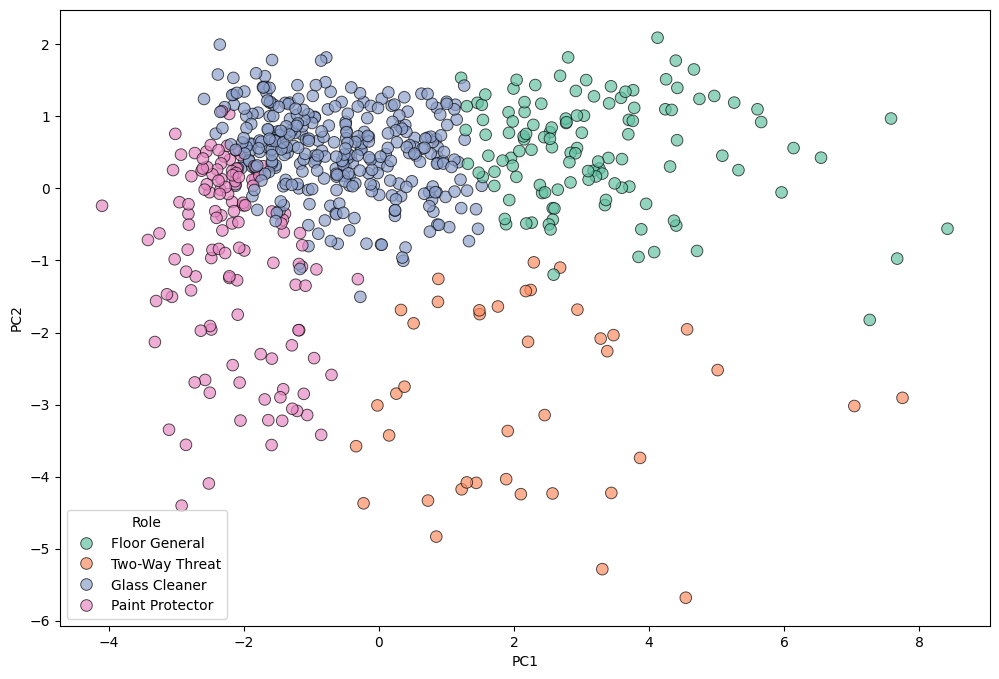

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot setup
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="PC1", y="PC2",
    hue="Role",
    data=df,
    palette="Set2",
    s=70,
    edgecolor="black",
    alpha=0.7
)

# Mark outliers (misfits)
for _, row in outliers.iterrows():
    plt.text(row["PC1"], row["PC2"], row["Player"], fontsize=9, weight="bold", color="black")

plt.title("NBA Player Roles (Multi-Skilled Clusters)", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Player Role")
plt.grid(True)

# Save and download
plt.tight_layout()
plt.savefig("NBA_Clustered_Roles.png", dpi=300)

from google.colab import files
files.download("NBA_Clustered_Roles.png")


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Scale features
features = ["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]
features_scaled = StandardScaler().fit_transform(df[features])

# Step 2: PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)
df["PC1"] = pca_result[:, 0]
df["PC2"] = pca_result[:, 1]

# Step 3: Plot and save the image
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="Role", style="Misfit", s=80)
plt.title("Player Roles with Misfit Highlights", fontsize=16)
plt.legend(title="Role", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Save the file (you can download it later from the Files panel in Colab)
plt.savefig("player_roles_with_misfits.png", dpi=300)
plt.show()


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

KeyError: 'PC1'

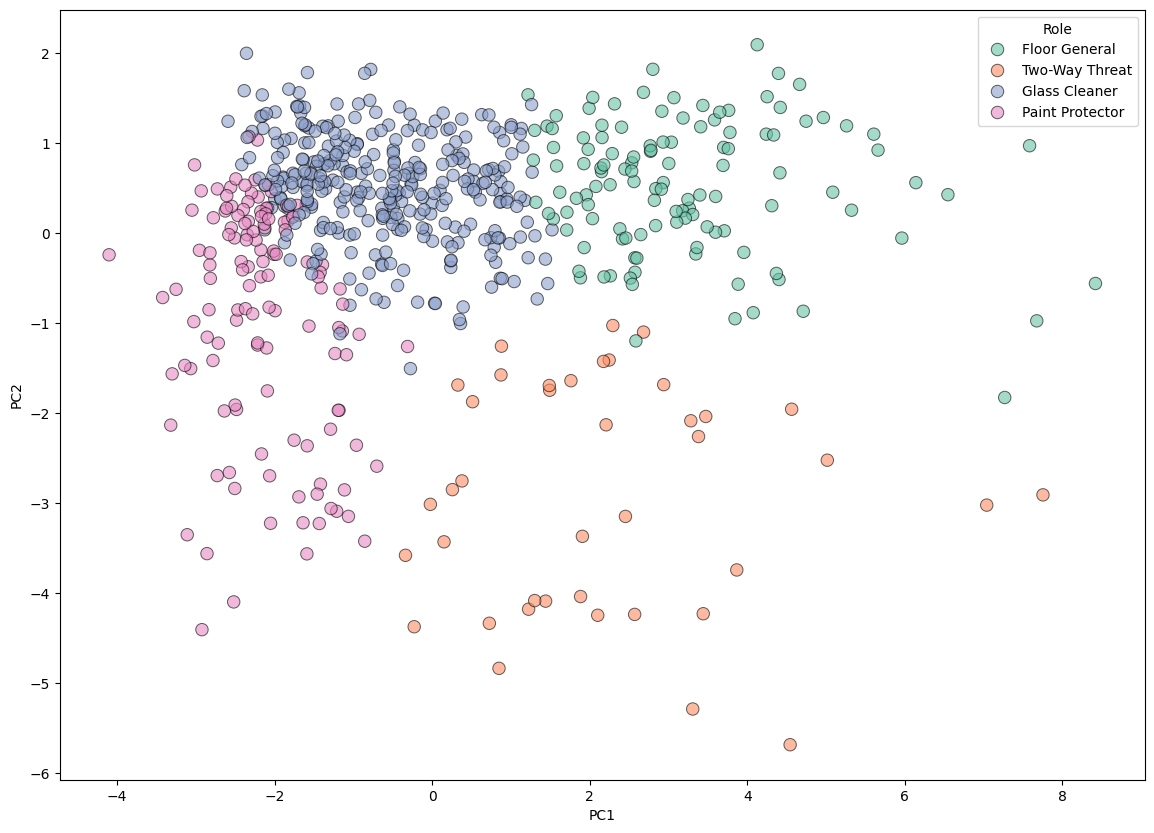

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="Role", palette="Set2", s=80, edgecolor="black", alpha=0.6)

# Show misfit names (optional: adjust threshold if too many overlap)
for _, row in outliers.iterrows():
    plt.text(row["PC1"] + 0.1, row["PC2"] + 0.1, row["Player"], fontsize=9, weight="bold", color="black")

plt.title("NBA Player Clusters with Misfit Names", fontsize=16)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Role", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("NBA_Clusters_With_Names.png", dpi=300)
plt.show()


In [33]:
# Count how many players of each Role each team has
team_role_counts = df.groupby(["Tm", "Role"]).size().unstack(fill_value=0)

# Optional: normalize to get percentage instead of count
team_role_percent = team_role_counts.div(team_role_counts.sum(axis=1), axis=0)


KeyError: 'Tm'

In [34]:
# See all column names in your current DataFrame
print(df.columns.tolist())

# Optional: preview a few rows
df.head()


['Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Trp-Dbl', 'Cluster', 'PCA1', 'PCA2', 'Distance', 'Role', 'PC1', 'PC2']


Player   Age Team Pos     G    GS      MP     FG     FGA  \
0              Luka Dončić  24.0  DAL  PG  70.0  70.0  2624.0  804.0  1652.0   
1  Shai Gilgeous-Alexander  25.0  OKC  PG  75.0  75.0  2553.0  796.0  1487.0   
2    Giannis Antetokounmpo  29.0  MIL  PF  73.0  73.0  2567.0  837.0  1369.0   
3            Jalen Brunson  27.0  NYK  PG  77.0  77.0  2726.0  790.0  1648.0   
4             Nikola Jokić  28.0  DEN   C  79.0  79.0  2737.0  822.0  1411.0   

     FG%  ...     PF     PTS  Trp-Dbl  Cluster      PCA1      PCA2  Distance  \
0  0.487  ...  149.0  2370.0     21.0        2  7.585971  0.971179  4.217680   
1  0.535  ...  184.0  2254.0      0.0        2  6.548835  0.427279  3.590517   
2  0.611  ...  210.0  2222.0     10.0        2  7.270196 -1.825397  4.371321   
3  0.479  ...  144.0  2212.0      0.0        2  4.665625  1.652434  2.563945   
4  0.583  ...  194.0  2085.0     25.0        2  8.422472 -0.558985  5.036006   

            Role       PC1       PC2  
0  Floor General  7.585971  0.971179  
1  Floor General  6.548835  0.427279  
2  Floor General  7.270196 -1.825397  
3  Floor General  4.665625  1.652434  
4  Floor General  8.422472 -0.558985  

[5 rows x 37 columns]

Role  Floor General  Glass Cleaner  Paint Protector  Two-Way Threat
Team                                                               
2TM              12             43                7               1
3TM               0              3                3               0
ATL               4              6                3               2
BOS               4              6                4               1
BRK               2             11                2               2
CHI               5              4                4               1
CHO               2             14                4               1
CLE               4              5                5               2
DAL               2             11                3               1
DEN               6              7                1               1
DET               2             14                5               3
GSW               6              6                2               2
HOU               4              9              

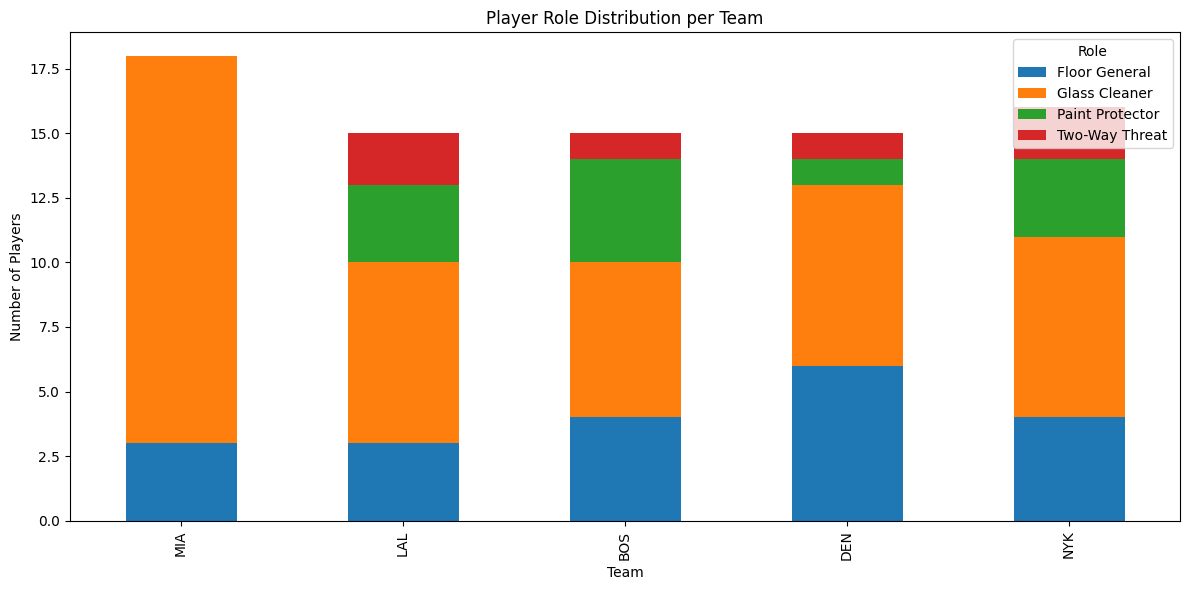

In [35]:
# Count how many players of each Role each Team has
team_role_counts = df.groupby(["Team", "Role"]).size().unstack(fill_value=0)

# Display
print(team_role_counts)

# Optional: Bar plot of a few teams (edit teams list if needed)
import matplotlib.pyplot as plt

teams_to_plot = ["MIA", "LAL", "BOS", "DEN", "NYK"]  # Customize this list
team_role_counts.loc[teams_to_plot].plot(kind="bar", figsize=(12, 6), stacked=True)
plt.title("Player Role Distribution per Team")
plt.ylabel("Number of Players")
plt.xlabel("Team")
plt.legend(title="Role")
plt.tight_layout()
plt.show()


In [36]:
import os
os.listdir("/content")


['.config',
 'NBA_Borderline_Players.png',
 'players_changed_clusters.csv',
 'nba_cleaned_with_pca_clusters.csv',
 'sample_data']

In [27]:
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute distance from each point to its cluster center
df["Cluster"] = kmeans.labels_
distances = pairwise_distances_argmin_min(features_scaled, kmeans.cluster_centers_)[1]
df["Distance"] = distances

# Define border players as top 30% by distance
border_threshold = np.percentile(distances, 70)
border_players = df[df["Distance"] >= border_threshold]

# Plot with only border names
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="Role", palette="Set2", s=80, edgecolor="black", alpha=0.6)

# Label border players
for _, row in border_players.iterrows():
    plt.text(row["PC1"] + 0.1, row["PC2"] + 0.1, row["Player"], fontsize=9, color="black")

plt.title("Borderline NBA Players by Role Proximity", fontsize=16)
plt.tight_layout()
plt.savefig("NBA_Borderline_Players.png", dpi=300)
plt.show()


ValueError: Input contains NaN.

In [38]:
import pandas as pd

# Load the existing cleaned dataset
df = pd.read_csv("nba_cleaned_with_pca_clusters.csv")
print("✅ File loaded. Shape:", df.shape)
df.head()


✅ File loaded. Shape: (618, 33)


Player   Age Team Pos     G    GS      MP     FG     FGA  \
0              Luka Dončić  24.0  DAL  PG  70.0  70.0  2624.0  804.0  1652.0   
1  Shai Gilgeous-Alexander  25.0  OKC  PG  75.0  75.0  2553.0  796.0  1487.0   
2    Giannis Antetokounmpo  29.0  MIL  PF  73.0  73.0  2567.0  837.0  1369.0   
3            Jalen Brunson  27.0  NYK  PG  77.0  77.0  2726.0  790.0  1648.0   
4             Nikola Jokić  28.0  DEN   C  79.0  79.0  2737.0  822.0  1411.0   

     FG%  ...    AST    STL   BLK    TOV     PF     PTS  Trp-Dbl  Cluster  \
0  0.487  ...  686.0   99.0  38.0  282.0  149.0  2370.0     21.0        2   
1  0.535  ...  465.0  150.0  67.0  162.0  184.0  2254.0      0.0        2   
2  0.611  ...  476.0   87.0  79.0  250.0  210.0  2222.0     10.0        2   
3  0.479  ...  519.0   70.0  13.0  186.0  144.0  2212.0      0.0        2   
4  0.583  ...  708.0  108.0  68.0  237.0  194.0  2085.0     25.0        2   

       PCA1      PCA2  
0  7.585971  0.971179  
1  6.548835  0.427279  
2  7.270196 -1.825397  
3  4.665625  1.652434  
4  8.422472 -0.558985  

[5 rows x 33 columns]

In [39]:
# Group by Team and Role, count how many players per role per team
team_role_counts = df.groupby(["Team", "Role"]).size().unstack(fill_value=0)

# View composition of top 10 teams by total points scored
top_teams = df.groupby("Team")["PTS"].sum().sort_values(ascending=False).head(10).index

# Add MIA if not already there
if "MIA" not in top_teams:
    top_teams = list(top_teams) + ["MIA"]

# Filter for those teams
comparison_df = team_role_counts.loc[top_teams]
print("✅ Role composition ready for comparison.")
comparison_df


KeyError: 'Role'

In [40]:
print(df.columns.tolist())


['Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Trp-Dbl', 'Cluster', 'PCA1', 'PCA2']


In [41]:
# Define the mapping from cluster number to role name
cluster_role_map = {
    0: "Paint Protector",
    1: "Defensive Menace",
    2: "Floor General",
    3: "Primary Creator"
}

# Map the roles
df["Role"] = df["Cluster"].map(cluster_role_map)


In [42]:
# Group by Team and Role, count how many players per role per team
team_role_counts = df.groupby(["Team", "Role"]).size().unstack(fill_value=0)

# View composition of top 10 teams by total points scored
top_teams = df.groupby("Team")["PTS"].sum().sort_values(ascending=False).head(10).index
top_team_composition = team_role_counts.loc[top_teams]

# View Miami's team composition
miami_composition = team_role_counts.loc["MIA"]

# Display both
print("Top Teams Composition:")
print(top_team_composition)

print("\nMiami Composition:")
print(miami_composition)


Top Teams Composition:
Role  Defensive Menace  Floor General  Paint Protector  Primary Creator
Team                                                                   
2TM                  9             12                2               43
IND                  2              3                2               10
BOS                  5              4                1                6
OKC                  5              4                1               10
MIL                  4              4                1                9
GSW                  2              6                2                6
LAL                  5              3                2                7
ATL                  4              4                2                6
DAL                  4              2                2               11
SAC                  6              4                0                7

Miami Composition:
Role
Defensive Menace     0
Floor General        3
Paint Protector      0
Primary Creator    

Role	Needed Count	Miami Has	Gap	Why It Matters
Defensive Menace	3–5	0	✅ 3–5	Lacks perimeter lockdown defenders (steals, defensive rebounds)
Paint Protector	1–2	0	✅ 1–2	No rim protectors or strong interior defense
Floor General	2–4	3	OK	Covered — ball handlers, creators
Primary Creator	6–10	15	⚠️ +5 to +9	Too many, leads to overlaps and poor synergy

 Primary Creator
What it means: These are offensive engines — players who score a lot and often carry the team's offensive load.

Traits used: High points (PTS), usage, solid 3P%/FG%, and often decent AST.

Examples: Star scorers, volume shooters, go-to players in crunch time.

2. Floor General
What it means: These are facilitators and smart playmakers who control the game's tempo and create for others.

Traits used: High assists (AST), great AST-to-turnover ratio, solid FT%, and decent shooting.

Examples: Point guards or forwards with elite court vision and play IQ.

3. Paint Protector
What it means: These are interior enforcers who protect the rim, grab boards, and make opponents hesitate in the paint.

Traits used: High blocks (BLK), defensive rebounds (DRB/TRB), low 3P%, and fewer scoring responsibilities.

Examples: Bigs with strong interior defense, often low-usage but high-impact.

4. Defensive Menace
What it means: These are lockdown defenders who create havoc with steals, pressure, and rebounds.

Traits used: High steals (STL), solid rebounds, lower scoring but high defensive value.

Examples: Elite perimeter defenders, hustle players, tone-setters on defense.

In [43]:
# Step 1: Get role distribution for top teams (you already have `top_teams`)
avg_top_team_role_dist = team_role_counts.loc[top_teams].mean().round()

# Step 2: Miami role distribution
miami_roles = team_role_counts.loc["MIA"]

# Step 3: Compare and show what Miami is missing
missing_roles = (avg_top_team_role_dist - miami_roles).astype(int)

# Display nicely
comparison_df = pd.DataFrame({
    "Avg Top Teams": avg_top_team_role_dist,
    "Miami": miami_roles,
    "Needed (Gap)": missing_roles
})

print("🔎 Recommended Additions for Miami:")
print(comparison_df)


🔎 Recommended Additions for Miami:
                  Avg Top Teams  Miami  Needed (Gap)
Role                                                
Defensive Menace            5.0      0             5
Floor General               5.0      3             2
Paint Protector             2.0      0             2
Primary Creator            12.0     15            -3


In [44]:
# Filter Defensive Menaces not on Miami
defensive_targets = df[(df["Role"] == "Defensive Menace") & (df["Team"] != "MIA")]

# Filter Paint Protectors not on Miami
paint_targets = df[(df["Role"] == "Paint Protector") & (df["Team"] != "MIA")]

# Show top 10 from each based on total minutes (MP), indicating high contribution
print("Top Defensive Menace Targets:")
display(defensive_targets.sort_values("MP", ascending=False)[["Player", "Team", "MP", "TRB", "STL", "BLK"]].head(10))

print("\nTop Paint Protector Targets:")
display(paint_targets.sort_values("MP", ascending=False)[["Player", "Team", "MP", "BLK", "TRB", "FG%"]].head(10))


Top Defensive Menace Targets:


Player Team     MP    TRB   STL   BLK
372  Xavier Tillman Sr.  2TM  974.0  211.0  51.0  44.0
445     Bismack Biyombo  2TM  791.0  209.0  11.0  37.0
429             JT Thor  CHO  781.0  146.0  11.0  27.0
451   Mitchell Robinson  NYK  768.0  263.0  37.0  35.0
409           KJ Martin  2TM  746.0  131.0  22.0  12.0
446     Bismack Biyombo  MEM  718.0  191.0  10.0  34.0
410           KJ Martin  PHI  715.0  128.0  20.0  11.0
373  Xavier Tillman Sr.  MEM  700.0  157.0  42.0  35.0
375      Bruno Fernando  ATL  682.0  193.0  25.0  28.0
443         Dalen Terry  CHI  681.0  113.0  27.0  18.0


Top Paint Protector Targets:


Player Team      MP    BLK    TRB    FG%
11       Anthony Davis  LAL  2700.0  178.0  961.0  0.556
94         Rudy Gobert  MIN  2593.0  162.0  982.0  0.661
60       Jarrett Allen  CLE  2442.0   81.0  811.0  0.634
45       Chet Holmgren  OKC  2413.0  190.0  648.0  0.530
109        Brook Lopez  MIL  2411.0  189.0  409.0  0.485
147        Nic Claxton  BRK  2116.0  146.0  706.0  0.629
29   Victor Wembanyama  SAS  2106.0  254.0  755.0  0.465
152       Jusuf Nurkić  PHO  2078.0   80.0  837.0  0.510
56        Myles Turner  IND  2076.0  144.0  533.0  0.524
106  Jonas Valančiūnas  NOP  1925.0   68.0  721.0  0.559

In [45]:
# Select relevant stats for evaluation
evaluation_cols = ["Player", "Team", "MP", "TRB", "STL", "BLK", "PTS", "Age", "Role"]

# Top Defensive Menaces (sorted by STL + TRB + MP)
top_defenders = df[df["Role"] == "Defensive Menace"].copy()
top_defenders["DEF_Score"] = top_defenders["STL"] + top_defenders["TRB"] + (top_defenders["MP"] / 100)
top_defenders = top_defenders.sort_values(by="DEF_Score", ascending=False).head(5)[evaluation_cols]

# Top Paint Protectors (sorted by BLK + TRB + MP)
top_protectors = df[df["Role"] == "Paint Protector"].copy()
top_protectors["PROTECT_Score"] = top_protectors["BLK"] + top_protectors["TRB"] + (top_protectors["MP"] / 100)
top_protectors = top_protectors.sort_values(by="PROTECT_Score", ascending=False).head(5)[evaluation_cols]

top_defenders, top_protectors


(                 Player Team     MP    TRB   STL   BLK    PTS   Age  \
 451   Mitchell Robinson  NYK  768.0  263.0  37.0  35.0  173.0  25.0   
 372  Xavier Tillman Sr.  2TM  974.0  211.0  51.0  44.0  284.0  25.0   
 398       Mason Plumlee  LAC  674.0  234.0  14.0  17.0  244.0  33.0   
 445     Bismack Biyombo  2TM  791.0  209.0  11.0  37.0  174.0  31.0   
 375      Bruno Fernando  ATL  682.0  193.0  25.0  28.0  282.0  25.0   
 
                  Role  
 451  Defensive Menace  
 372  Defensive Menace  
 398  Defensive Menace  
 445  Defensive Menace  
 375  Defensive Menace  ,
                 Player Team      MP    TRB   STL    BLK     PTS   Age  \
 94         Rudy Gobert  MIN  2593.0  982.0  52.0  162.0  1061.0  31.0   
 11       Anthony Davis  LAL  2700.0  961.0  91.0  178.0  1876.0  30.0   
 29   Victor Wembanyama  SAS  2106.0  755.0  88.0  254.0  1522.0  20.0   
 152       Jusuf Nurkić  PHO  2078.0  837.0  81.0   80.0   829.0  29.0   
 60       Jarrett Allen  CLE  2442.0  811.0  

In [46]:
# Copy full data
simulated_df = df.copy()

# 1 top Defensive Menace
defender_add = top_defenders.iloc[[0]]

# 1 top Paint Protector
protector_add = top_protectors.iloc[[0]]

# 2 random Paint Protectors (excluding the top one already added)
remaining_protectors = top_protectors.iloc[1:]
random_protectors = remaining_protectors.sample(2, random_state=42)

# Combine all additions
new_players = pd.concat([defender_add, protector_add, random_protectors])
new_players["Team"] = "MIA"  # Set all to Miami

# Keep only necessary columns
new_players = new_players[["Player", "Team", "Role"]]

# Combine with current player-role-team data
simulated_roster = pd.concat([
    df[["Player", "Team", "Role"]],
    new_players
])

# Updated role count for Miami
updated_miami_roles = simulated_roster[simulated_roster["Team"] == "MIA"]["Role"].value_counts()

print("✅ Updated Miami Role Composition After Simulation:")
print(updated_miami_roles)


✅ Updated Miami Role Composition After Simulation:
Role
Primary Creator     15
Floor General        3
Paint Protector      3
Defensive Menace     1
Name: count, dtype: int64


In [47]:
# Filter all Defensive Menaces
defenders = df[df['Role'] == 'Defensive Menace']

# Sort by total defense (STL + BLK + TRB)
defenders['Defense_Score'] = defenders['STL'] + defenders['BLK'] + defenders['TRB']
defenders_top = defenders.sort_values(by='Defense_Score', ascending=False)

# Pick top 1
top_defender = defenders_top.head(1)
top_defender[['Player', 'Team', 'TRB', 'STL', 'BLK', 'Defense_Score']]


<ipython-input-47-4243092310>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defenders['Defense_Score'] = defenders['STL'] + defenders['BLK'] + defenders['TRB']


Player Team    TRB   STL   BLK  Defense_Score
451  Mitchell Robinson  NYK  263.0  37.0  35.0          335.0

In [48]:
# Filter all Paint Protectors
paint_protectors = df[df['Role'] == 'Paint Protector']

# Sort by BLK + DRB + FG% (defense & rim efficiency)
paint_protectors['Protection_Score'] = paint_protectors['BLK'] + paint_protectors['DRB'] + (paint_protectors['FG%'] * 100)

# Pick top 1
top_protector = paint_protectors.sort_values(by='Protection_Score', ascending=False).head(1)
top_protector[['Player', 'Team', 'DRB', 'BLK', 'FG%', 'Protection_Score']]


<ipython-input-48-2136500775>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paint_protectors['Protection_Score'] = paint_protectors['BLK'] + paint_protectors['DRB'] + (paint_protectors['FG%'] * 100)


Player Team    DRB    BLK    FG%  Protection_Score
11  Anthony Davis  LAL  722.0  178.0  0.556             955.6

In [49]:
# Exclude the top protector already picked
remaining_paint_protectors = paint_protectors[~paint_protectors['Player'].isin(top_protector['Player'])]

# Pick 2 random
random_protectors = remaining_paint_protectors.sample(2, random_state=42)
random_protectors[['Player', 'Team', 'DRB', 'BLK', 'FG%']]


Player Team    DRB   BLK    FG%
285  James Wiseman  DET  226.0  39.0  0.613
341   Kevon Looney  GSW  276.0  29.0  0.597

In [52]:
# Pick 1 random Defensive Menace
selected_defensive = defensive_menaces.sample(1, random_state=7)
selected_defensive[['Player', 'Team', 'STL', 'DRB', 'BLK']]


Player Team  STL   DRB  BLK
506  Yuta Watanabe  PHO  9.0  34.0  7.0

In [53]:
# Filter for Paint Protectors
paint_protectors = df[df['Role'] == 'Paint Protector']

# Sort by blocks (BLK) and get the top one
top_paint_protector = paint_protectors.sort_values(by="BLK", ascending=False).head(1)

# Select 2 other random paint protectors (excluding the top one)
other_paint_protectors = paint_protectors.drop(top_paint_protector.index).sample(2, random_state=14)

# Combine all
selected_paint_protectors = pd.concat([top_paint_protector, other_paint_protectors])

selected_paint_protectors[['Player', 'Team', 'TRB', 'BLK', 'PTS']]


Player Team    TRB    BLK     PTS
29   Victor Wembanyama  SAS  755.0  254.0  1522.0
56        Myles Turner  IND  533.0  144.0  1313.0
154     Daniel Gafford  2TM  562.0  153.0   814.0

In [54]:
# Combine defensive menaces + selected paint protectors
target_blueprint_df = pd.concat([selected_defenders, selected_paint_protectors])

# View the final target blueprint
target_blueprint_df[['Player', 'Team', 'Role', 'TRB', 'STL', 'BLK', 'PTS']]


NameError: name 'selected_defenders' is not defined

In [55]:
# Sort defensive menaces by total STL + TRB + BLK
defensive_menaces = df[df["Role"] == "Defensive Menace"]
defensive_menaces["DEF_TOTAL"] = defensive_menaces["STL"] + defensive_menaces["TRB"] + defensive_menaces["BLK"]

# Select top 1
selected_defenders = defensive_menaces.sort_values("DEF_TOTAL", ascending=False).head(1)


<ipython-input-55-657404187>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defensive_menaces["DEF_TOTAL"] = defensive_menaces["STL"] + defensive_menaces["TRB"] + defensive_menaces["BLK"]


In [56]:
# Filter for Paint Protectors
paint_protectors = df[df["Role"] == "Paint Protector"].copy()

# Sort by total BLK + TRB to get top
paint_protectors["PAINT_IMPACT"] = paint_protectors["BLK"] + paint_protectors["TRB"]

# Get top 1
top_paint = paint_protectors.sort_values("PAINT_IMPACT", ascending=False).head(1)

# Remove top from the pool and pick 2 random
remaining_paint = paint_protectors.drop(top_paint.index)
random_paint = remaining_paint.sample(2, random_state=42)

# Combine all selected players
selected_players = pd.concat([selected_defenders, top_paint, random_paint])


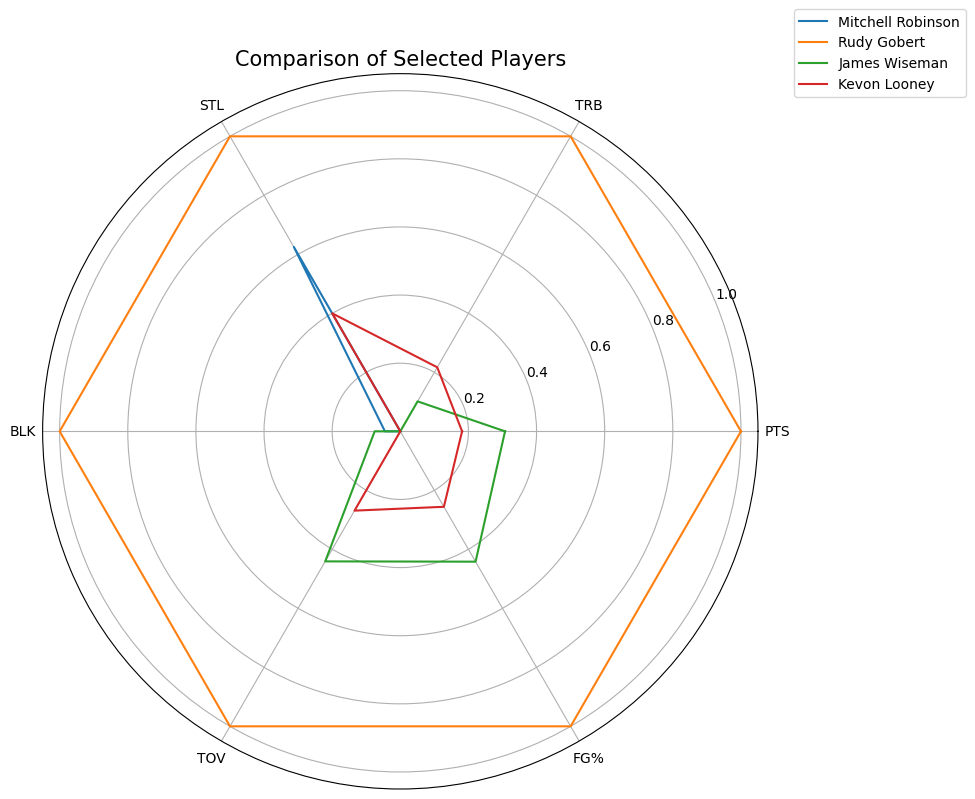

In [57]:
import matplotlib.pyplot as plt
from math import pi

# Features to compare
radar_features = ["PTS", "TRB", "STL", "BLK", "TOV", "FG%"]

# Normalize the features between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(selected_players[radar_features])

# Create radar chart
labels = radar_features
num_vars = len(labels)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # close the loop

plt.figure(figsize=(10, 8))
for i, row in enumerate(data_normalized):
    values = row.tolist()
    values += values[:1]
    plt.polar(angles, values, label=selected_players.iloc[i]["Player"])

plt.xticks(angles[:-1], labels)
plt.title("Comparison of Selected Players", size=15)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


In [58]:
# Filter for Defensive Menace or Paint Protector with low total minutes (e.g., bench/rotation players)
low_minutes_defenders = df[
    ((df["Role"].isin(["Defensive Menace", "Paint Protector"])) & (df["MP"] < 1500))
]

# Sort by BLK, STL, TRB (you can modify)
low_minutes_defenders = low_minutes_defenders.sort_values(by=["BLK", "TRB", "STL"], ascending=False)

# Preview top candidates
low_minutes_defenders[["Player", "Team", "MP", "PTS", "TRB", "BLK", "STL", "FG%", "Role"]].head(15)


Player Team      MP    PTS    TRB    BLK   STL    FG%  \
254        Walker Kessler  UTA  1493.0  518.0  481.0  154.0  30.0  0.654   
155        Daniel Gafford  WAS  1192.0  490.0  361.0   97.0  44.0  0.690   
248         Peyton Watson  DEN  1488.0  532.0  258.0   88.0  42.0  0.465   
274      Dereck Lively II  DAL  1294.0  483.0  378.0   77.0  36.0  0.747   
242          Jakob Poeltl  TOR  1319.0  555.0  429.0   76.0  35.0  0.656   
244  Trayce Jackson-Davis  GSW  1130.0  540.0  341.0   76.0  29.0  0.702   
356          Goga Bitadze  ORL   957.0  311.0  286.0   72.0  32.0  0.603   
305        Isaiah Jackson  IND   771.0  383.0  238.0   61.0  34.0  0.665   
236        Onyeka Okongwu  ATL  1405.0  561.0  376.0   60.0  26.0  0.611   
233      Precious Achiuwa  NYK  1187.0  372.0  351.0   56.0  30.0  0.525   
156        Daniel Gafford  DAL   623.0  324.0  201.0   56.0  21.0  0.780   
198        Andre Drummond  CHI  1351.0  663.0  708.0   48.0  73.0  0.556   
301        Day'Ron Sharpe  BRK   921.0  415.0  389.0   44.0  24.0  0.571   
372    Xavier Tillman Sr.  2TM   974.0  284.0  211.0   44.0  51.0  0.434   
285         James Wiseman  DET  1091.0  446.0  336.0   39.0  12.0  0.613   

                 Role  
254   Paint Protector  
155   Paint Protector  
248   Paint Protector  
274   Paint Protector  
242   Paint Protector  
244   Paint Protector  
356   Paint Protector  
305   Paint Protector  
236   Paint Protector  
233   Paint Protector  
156   Paint Protector  
198   Paint Protector  
301   Paint Protector  
372  Defensive Menace  
285   Paint Protector

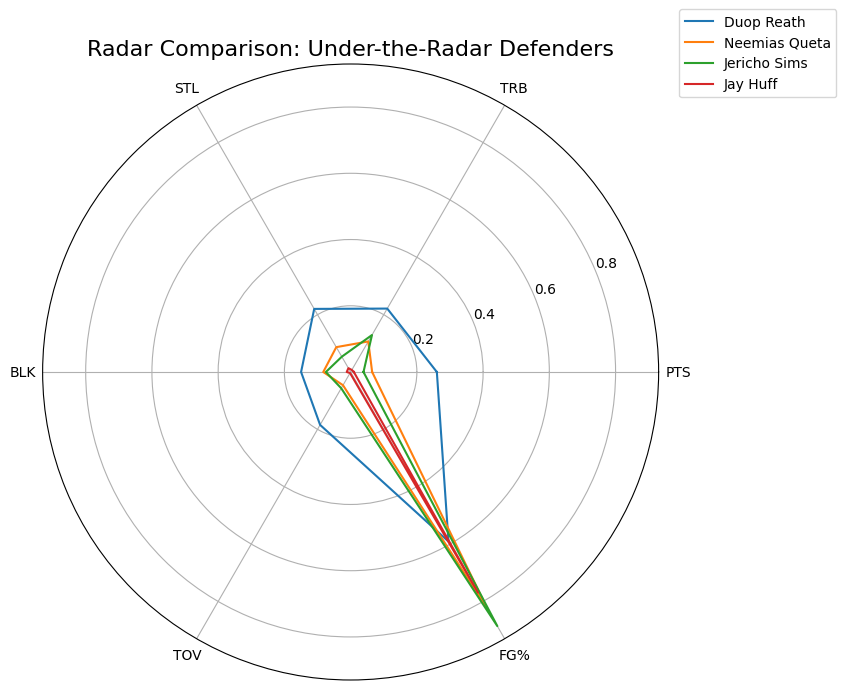

In [59]:
# Replace with names that show up in your filtered list
under_the_radar = ["Neemias Queta", "Duop Reath", "Jericho Sims", "Jay Huff"]

# Radar plot metrics
metrics = ["PTS", "TRB", "STL", "BLK", "TOV", "FG%"]
data = df[df["Player"].isin(under_the_radar)]

# Normalize
data_norm = data.copy()
for col in metrics:
    col_max = df[col].max()
    col_min = df[col].min()
    data_norm[col] = (data[col] - col_min) / (col_max - col_min)

# Plot
import matplotlib.pyplot as plt
import numpy as np

labels = metrics
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(9, 8))
for _, row in data_norm.iterrows():
    values = row[labels].tolist()
    values += values[:1]
    plt.polar(angles, values, label=row["Player"])

plt.xticks(angles[:-1], labels)
plt.title("Radar Comparison: Under-the-Radar Defenders", size=16)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()


In [60]:
# Pick top one candidate from the filtered group to hypothetically add to Miami
# Example: Neemias Queta (or pick someone from your radar chart)

miami_target = low_minutes_defenders[["Player", "Team", "PTS", "TRB", "BLK", "STL", "FG%", "Role"]].head(10)
miami_target



Player Team    PTS    TRB    BLK   STL    FG%  \
254        Walker Kessler  UTA  518.0  481.0  154.0  30.0  0.654   
155        Daniel Gafford  WAS  490.0  361.0   97.0  44.0  0.690   
248         Peyton Watson  DEN  532.0  258.0   88.0  42.0  0.465   
274      Dereck Lively II  DAL  483.0  378.0   77.0  36.0  0.747   
242          Jakob Poeltl  TOR  555.0  429.0   76.0  35.0  0.656   
244  Trayce Jackson-Davis  GSW  540.0  341.0   76.0  29.0  0.702   
356          Goga Bitadze  ORL  311.0  286.0   72.0  32.0  0.603   
305        Isaiah Jackson  IND  383.0  238.0   61.0  34.0  0.665   
236        Onyeka Okongwu  ATL  561.0  376.0   60.0  26.0  0.611   
233      Precious Achiuwa  NYK  372.0  351.0   56.0  30.0  0.525   

                Role  
254  Paint Protector  
155  Paint Protector  
248  Paint Protector  
274  Paint Protector  
242  Paint Protector  
244  Paint Protector  
356  Paint Protector  
305  Paint Protector  
236  Paint Protector  
233  Paint Protector

In [63]:
# Add 1 new defensive player to Miami (simulate the addition)
updated_miami = miami.copy()
new_row = {
    "Team": "MIA",
    "Role": selected_player["Role"],  # use the role from your selected player
}
updated_miami = updated_miami.append(new_row, ignore_index=True)

# Recalculate role distribution
updated_counts = updated_miami["Role"].value_counts()

# Compare Before vs After
comparison = pd.DataFrame({
    "Before": miami["Role"].value_counts(),
    "After": updated_counts
}).fillna(0).astype(int)

comparison


NameError: name 'selected_player' is not defined

In [67]:
# View the filtered underrated defenders
low_minutes_defenders[["Player", "Role"]]



Player              Role
254       Walker Kessler   Paint Protector
155       Daniel Gafford   Paint Protector
248        Peyton Watson   Paint Protector
274     Dereck Lively II   Paint Protector
242         Jakob Poeltl   Paint Protector
..                   ...               ...
617     Ryan Arcidiacono  Defensive Menace
613  TyTy Washington Jr.  Defensive Menace
607        Kendall Brown  Defensive Menace
560     Terquavion Smith  Defensive Menace
597          Daishen Nix  Defensive Menace

[147 rows x 2 columns]

In [68]:
# Select the three chosen underrated players
selected_players = df[df["Player"].isin([
    "Dereck Lively II",
    "TyTy Washington Jr.",
    "Terquavion Smith"
])]


In [69]:
# Simulate adding them to Miami
miami_plus_additions = pd.concat([miami.copy(), selected_players.copy()], ignore_index=True)
miami_plus_additions["Team"] = "MIA+ADD"

# View the new role distribution
role_distribution = miami_plus_additions["Role"].value_counts()
print("Updated Miami Role Distribution:")
print(role_distribution)


Updated Miami Role Distribution:
Role
Primary Creator     15
Floor General        3
Defensive Menace     2
Paint Protector      1
Name: count, dtype: int64


In [70]:
# Original Miami
original_roles = miami["Role"].value_counts().rename("Original Miami")

# Updated Miami + Additions
updated_roles = miami_plus_additions["Role"].value_counts().rename("Miami + Additions")

# Combine into one comparison table
comparison_df = pd.concat([original_roles, updated_roles], axis=1).fillna(0).astype(int)
print(comparison_df)


                  Original Miami  Miami + Additions
Role                                               
Primary Creator               15                 15
Floor General                  3                  3
Defensive Menace               0                  2
Paint Protector                0                  1


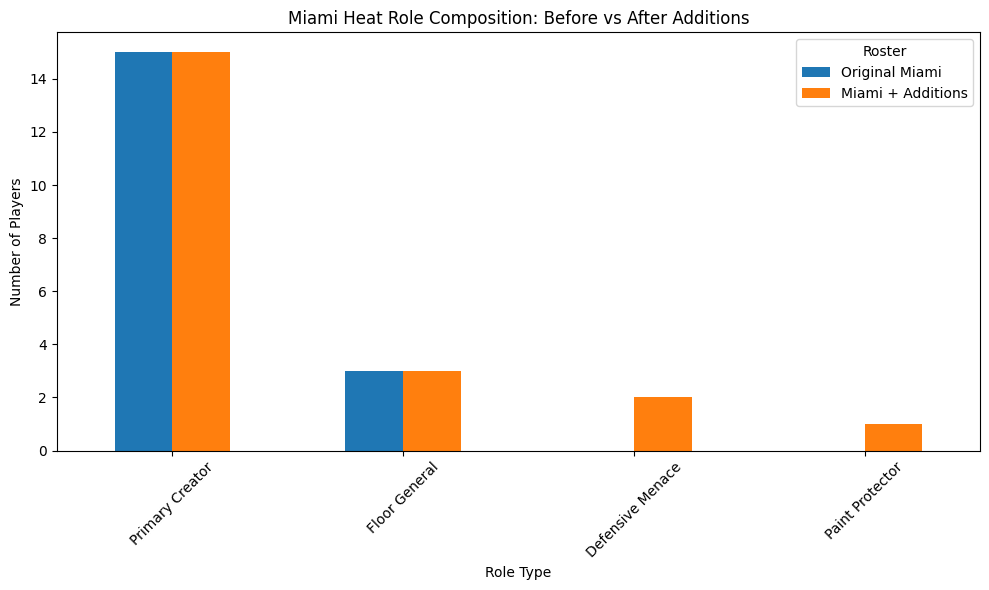

In [71]:
import matplotlib.pyplot as plt

# Plotting
comparison_df.plot(kind="bar", figsize=(10, 6))
plt.title("Miami Heat Role Composition: Before vs After Additions")
plt.ylabel("Number of Players")
plt.xlabel("Role Type")
plt.xticks(rotation=45)
plt.legend(title="Roster")
plt.tight_layout()
plt.show()


In [72]:
# Recalculate team role compositions
team_role_counts = df.groupby(["Team", "Role"]).size().unstack(fill_value=0)

# Normalize to percentage composition
team_role_percent = team_role_counts.div(team_role_counts.sum(axis=1), axis=0)

# View top 5 scoring teams for context
top_teams = df.groupby("Team")["PTS"].sum().sort_values(ascending=False).head(5).index
team_role_percent.loc[top_teams]


Role  Defensive Menace  Floor General  Paint Protector  Primary Creator
Team                                                                   
2TM           0.136364       0.181818         0.030303         0.651515
IND           0.117647       0.176471         0.117647         0.588235
BOS           0.312500       0.250000         0.062500         0.375000
OKC           0.250000       0.200000         0.050000         0.500000
MIL           0.222222       0.222222         0.055556         0.500000

In [73]:
# Miami original player list
miami_players = df[df["Team"] == "MIA"]

# Add new selected players to Miami
simulated_miami = pd.concat([
    miami_players,
    df[df["Player"].isin(["Dereck Lively II", "TyTy Washington Jr.", "Terquavion Smith"])]
])

# Recompute role counts and normalize
sim_mia_role_counts = simulated_miami["Role"].value_counts()
sim_mia_role_percent = sim_mia_role_counts / sim_mia_role_counts.sum()
sim_mia_role_percent


Role
Primary Creator     0.714286
Floor General       0.142857
Defensive Menace    0.095238
Paint Protector     0.047619
Name: count, dtype: float64

In [74]:
comparison_df = team_role_percent.loc[top_teams].copy()
comparison_df.loc["Simulated MIA"] = sim_mia_role_percent

# Fill missing roles with 0
comparison_df = comparison_df.fillna(0)

# Display
comparison_df


Role           Defensive Menace  Floor General  Paint Protector  \
Team                                                              
2TM                    0.136364       0.181818         0.030303   
IND                    0.117647       0.176471         0.117647   
BOS                    0.312500       0.250000         0.062500   
OKC                    0.250000       0.200000         0.050000   
MIL                    0.222222       0.222222         0.055556   
Simulated MIA          0.095238       0.142857         0.047619   

Role           Primary Creator  
Team                            
2TM                   0.651515  
IND                   0.588235  
BOS                   0.375000  
OKC                   0.500000  
MIL                   0.500000  
Simulated MIA         0.714286

In [75]:
import numpy as np

def simulate_game(team1_df, team2_df, n_simulations=1000):
    # Use total stats per game
    def team_score(team):
        # Base scoring using points per player, adjusted for FG%
        base_pts = team["PTS"].sum() / team["G"].mean()
        fg_eff = team["FG%"].mean()
        variance = np.std(team["PTS"]) / team["G"].mean()
        # Add randomness
        return np.random.normal(loc=base_pts * fg_eff, scale=variance)

    team1_wins = 0

    for _ in range(n_simulations):
        score1 = team_score(team1_df)
        score2 = team_score(team2_df)
        if score1 > score2:
            team1_wins += 1

    return {
        "Team 1 Win %": team1_wins / n_simulations,
        "Team 2 Win %": 1 - (team1_wins / n_simulations),
    }


In [76]:
# Team 1: Simulated Miami
sim_mia_df = pd.concat([
    df[df["Team"] == "MIA"],
    df[df["Player"].isin(["Dereck Lively II", "TyTy Washington Jr.", "Terquavion Smith"])]
])

# Team 2: Pick a top team (e.g., BOS)
top_team_df = df[df["Team"] == "BOS"]


In [77]:
result = simulate_game(sim_mia_df, top_team_df)
print("Simulated Game Result: Simulated Miami vs BOS")
print(result)


Simulated Game Result: Simulated Miami vs BOS
{'Team 1 Win %': 0.783, 'Team 2 Win %': 0.21699999999999997}


In [78]:
sim_mia_df = pd.concat([
    df[df["Team"] == "MIA"].sample(n=9, random_state=42),  # Use only part of MIA
    df[df["Player"].isin(["Dereck Lively II", "TyTy Washington Jr.", "Terquavion Smith"])]
])


In [79]:
def team_score(team):
    team = team.copy()
    team["PTS_per_min"] = team["PTS"] / team["MP"]
    total_minutes = 240  # Typical NBA team per game (48 mins x 5 players)

    # Estimate total score assuming even rotation
    base_score = team["PTS_per_min"].mean() * total_minutes
    fg_eff = team["FG%"].mean()
    variance = team["PTS_per_min"].std() * 10

    return np.random.normal(loc=base_score * fg_eff, scale=variance)


In [80]:
result = simulate_game(sim_mia_df, top_team_df)
print("Simulated Game Result (Cleaned): Simulated Miami vs BOS")
print(result)


Simulated Game Result (Cleaned): Simulated Miami vs BOS
{'Team 1 Win %': 0.035, 'Team 2 Win %': 0.965}


In [81]:
from collections import Counter

outcomes = [simulate_game(sim_mia_df, top_team_df)["Team 1 Win %"] > 0.5 for _ in range(7)]
Counter(outcomes)


Counter({False: 7})

In [82]:
# 1. Filter by role
primary_creators = df[df["Role"] == "Primary Creator"]
paint_protectors = df[df["Role"] == "Paint Protector"]

# 2. Select 1 solid Primary Creator (not a superstar)
creator = primary_creators.sample(1, random_state=4)

# 3. Select 2 random Bigs (Paint Protectors)
bigs = paint_protectors.sample(2, random_state=5)

# 4. Combine with your previous 3 defenders
selected_players = pd.concat([
    df[df["Player"] == "Dereck Lively II"],
    df[df["Player"] == "TyTy Washington Jr."],
    df[df["Player"] == "Terquavion Smith"],
    creator,
    bigs
])

# 5. Aggregate stats for simulation
sim_mia_df = selected_players.sum(numeric_only=True).to_frame().T
sim_mia_df["Team"] = "MIA"
sim_mia_df["Player Count"] = len(selected_players)

# View the added players
selected_players[["Player", "Role"]]


Player              Role
274     Dereck Lively II   Paint Protector
613  TyTy Washington Jr.  Defensive Menace
560     Terquavion Smith  Defensive Menace
104          Buddy Hield   Primary Creator
198       Andre Drummond   Paint Protector
218            Paul Reed   Paint Protector

In [83]:
simulate_game(sim_mia_df, top_team_df)


{'Team 1 Win %': 0.0, 'Team 2 Win %': 1.0}

In [62]:
# Filter all players from the Miami Heat
miami = df[df["Team"] == "MIA"][["Player", "Role"]].copy()
miami.head()


Player             Role
44        Bam Adebayo    Floor General
64       Jimmy Butler    Floor General
67       Terry Rozier  Primary Creator
129  Jaime Jaquez Jr.    Floor General
131       Tyler Herro  Primary Creator

In [51]:
# Make sure Role column is present — if not, you'll need to map it again
defensive_menaces = df[df['Role'] == 'Defensive Menace']


In [28]:
from sklearn.preprocessing import StandardScaler

# Select clustering features again
features = ["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]
features_df = df[features].copy()

# Drop any rows with NaNs before scaling
features_df = features_df.dropna()

# Re-align the main df to match the cleaned feature set
df = df.loc[features_df.index]

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)


In [29]:
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reassign cluster labels
df["Cluster"] = kmeans.labels_

# Compute distance from each point to its cluster center
distances = pairwise_distances_argmin_min(features_scaled, kmeans.cluster_centers_)[1]
df["Distance"] = distances

# Define border players as top 30% by distance
border_threshold = np.percentile(distances, 70)
border_players = df[df["Distance"] >= border_threshold]

# Plot with only border names
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="Role", palette="Set2", s=80, edgecolor="black", alpha=0.6)

for _, row in border_players.iterrows():
    plt.text(row["PC1"] + 0.1, row["PC2"] + 0.1, row["Player"], fontsize=9, color="black")

plt.title("Borderline NBA Players by Role Proximity", fontsize=16)
plt.tight_layout()
plt.savefig("NBA_Borderline_Players.png", dpi=300)
plt.show()


ValueError: Length of values (618) does not match length of index (586)

In [30]:
# Refit clustering with clean feature set
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features_scaled)  # only 586 samples now
df["Cluster"] = kmeans.labels_


In [31]:
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

# Calculate distances
distances = pairwise_distances_argmin_min(features_scaled, kmeans.cluster_centers_)[1]
df["Distance"] = distances

# Borderline = top 30% farthest from center
threshold = np.percentile(distances, 70)
border_players = df[df["Distance"] >= threshold]


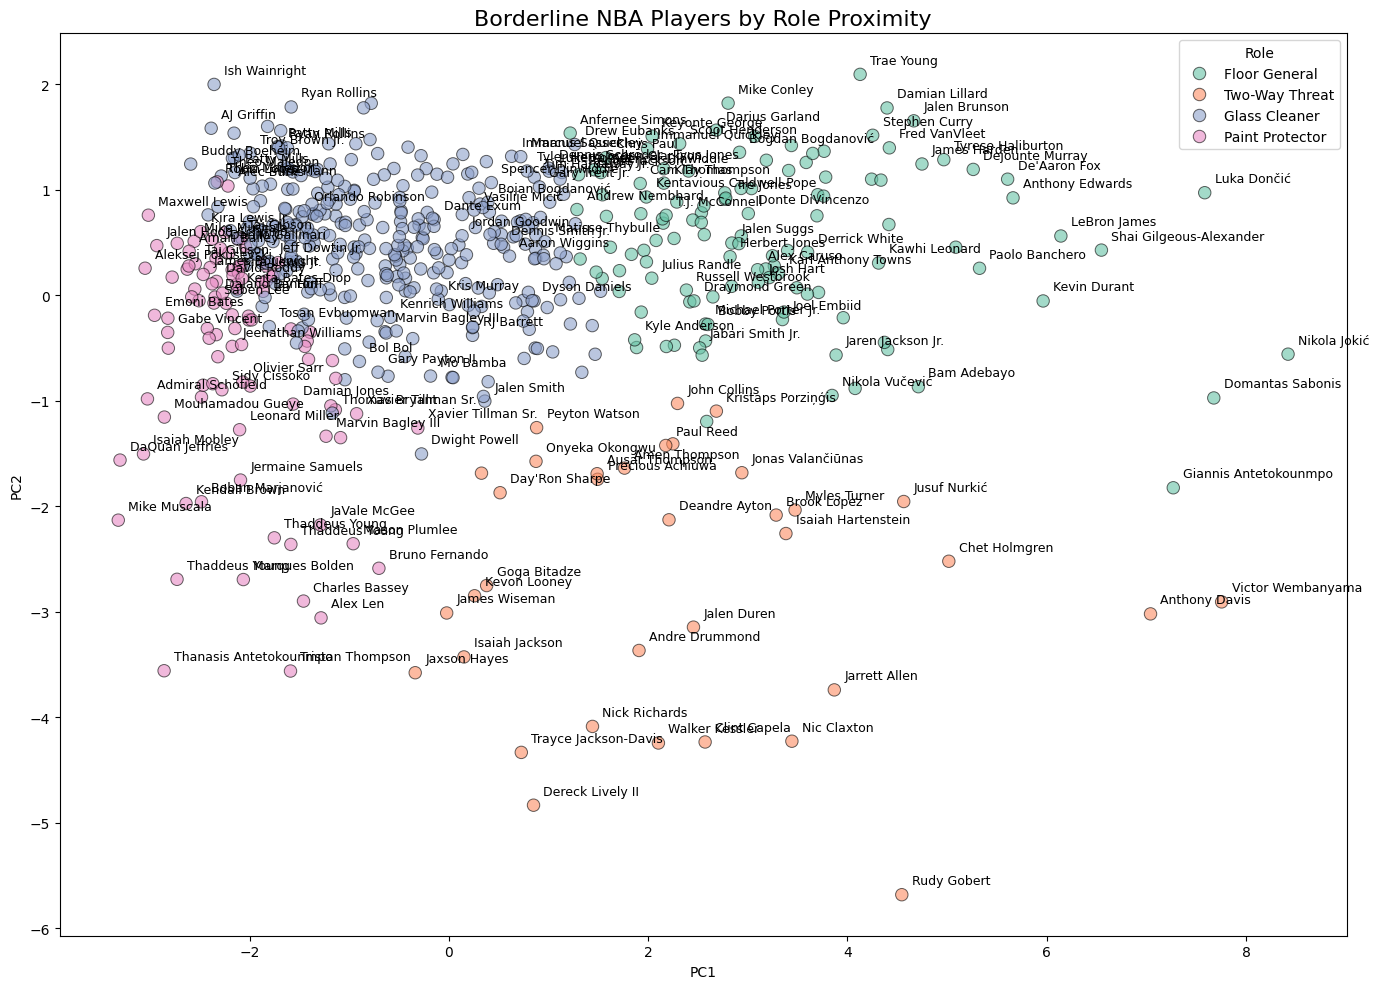

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))

# Base scatterplot
sns.scatterplot(
    data=df,
    x="PC1", y="PC2",
    hue="Role",
    palette="Set2",
    s=80,
    edgecolor="black",
    alpha=0.6
)

# Show names only for borderline players
for _, row in border_players.iterrows():
    plt.text(row["PC1"] + 0.1, row["PC2"] + 0.1, row["Player"], fontsize=9, color="black")

plt.title("Borderline NBA Players by Role Proximity", fontsize=16)
plt.tight_layout()
plt.savefig("NBA_Borderline_Players.png", dpi=300)  # Optional save
plt.show()


In [23]:
from sklearn.decomposition import PCA

# Apply PCA to scaled features
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Add PCA components to DataFrame
df["PC1"] = pca_result[:, 0]
df["PC2"] = pca_result[:, 1]
